# 1. Dataset information

#### Description:

The aim of this playground competition, hosted in partnership with Google Cloud and Coursera, is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.

### The datset contains the following fields:

1. unique_id - a unique identifier for each trip
2. amount - the cost of each trip in usd
3. date_time_of_pickup - date and time when the meter was engaged
4. no_of_passenger - the number of passengers in the vehicle (driver entered value)
5. longitude_of_pickup - the longitude where the meter was engaged
6. latitude_of_pickup- the latitude where the meter was engaged
7. longitude_of_dropoff - the longitude where the meter was disengaged
8. latitude_of_dropoff - the latitude where the meter was disengaged

# 2. Import the required libraries

In [146]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# 3. Load the dataset

In [145]:
df = pd.read_csv('taxifare.csv')
df_test = pd.read_csv('taxifare.csv')

df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
df.head

<bound method NDFrame.head of       unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1       52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2       35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3       30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4       51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...         ...     ...                      ...                  ...   
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.72

# 4. Data Wrangling

## File structure and content

In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


## Checking for Missing Values

In [38]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_hour             0
pickup_weekday          0
pickup_date             0
pickup_month            0
pickup_day              0
base_fare               0
fare                    0
haversine_distance      0
dtype: int64

In [39]:
df.nunique()

unique_id                3597
amount                    700
date_time_of_pickup     49555
longitude_of_pickup     33716
latitude_of_pickup      36594
longitude_of_dropoff    34878
latitude_of_dropoff     37423
no_of_passenger             7
pickup_hour                24
pickup_weekday              7
pickup_date                31
pickup_month               12
pickup_day                  7
base_fare                   3
fare                      864
haversine_distance      48552
dtype: int64

## Checking for duplicates

In [40]:
df.duplicated().sum()

0

## Data preprocessing

### Data Dealing with missing values

Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow. Here, it is better to simply drop the whole row with NaN, as only 8 rows are having missing values.

In [41]:
df.dropna(axis=0, inplace=True)
np.sum(pd.isnull(df))

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_hour             0
pickup_weekday          0
pickup_date             0
pickup_month            0
pickup_day              0
base_fare               0
fare                    0
haversine_distance      0
dtype: int64

In [42]:
# Setting minimum fare amount to zero. 
df['amount'][df['amount']<0] = 0.1
df[df['amount']<0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,base_fare,fare,haversine_distance


# 5. Feature Engineering

There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features. As we can only feed numeric features as input to our models, our next task is to convert the features in numeric form. Feature engineering is the process of extracting information from the existing data in order to improve the performance of the model. Feature engineering is subdivided into two parts: Feature prepocessing & Feature generation

### 5.2 Feature Preprocessing

Feature preprocessing implies updating or transforming existing data.

#### Feature Transformation of pickup_datetime data type to datetime
By Default all datetime based columns are considered as strings in pandas. Convert string date to datetime features.

In [43]:
df['date_time_of_pickup'] = pd.to_datetime(df.date_time_of_pickup)
df_test['date_time_of_pickup'] = pd.to_datetime(df_test.date_time_of_pickup)

In [44]:
df.loc[:, 'pickup_hour'] = df['date_time_of_pickup'].dt.hour
df.loc[:, 'pickup_weekday'] = df['date_time_of_pickup'].dt.day_name()
df.loc[:, 'pickup_date'] = df['date_time_of_pickup'].dt.day
df.loc[:, 'pickup_month'] = df['date_time_of_pickup'].dt.month
df.loc[:, 'pickup_day'] = df['date_time_of_pickup'].dt.dayofweek
df_test.loc[:, 'pickup_hour'] = df_test['date_time_of_pickup'].dt.hour
df_test.loc[:, 'pickup_weekday'] = df_test['date_time_of_pickup'].dt.day_name()
df_test.loc[:, 'pickup_date'] = df_test['date_time_of_pickup'].dt.day
df_test.loc[:, 'pickup_month'] = df_test['date_time_of_pickup'].dt.month
df_test.loc[:, 'pickup_day'] = df_test['date_time_of_pickup'].dt.dayofweek

In [45]:
def baseFare(x):
    if x in range(16,20):
        base_fare = 3.50
    elif x in range(20,24):
        base_fare = 3
    else:
        base_fare = 2.50
    return base_fare

df['base_fare'] = df['pickup_hour'].apply(baseFare)
df_test['base_fare'] = df_test['pickup_hour'].apply(baseFare)
df['base_fare'], df['pickup_hour']

(0        3.5
 1        3.5
 2        2.5
 3        2.5
 4        2.5
         ... 
 49995    3.0
 49996    3.5
 49997    2.5
 49998    2.5
 49999    2.5
 Name: base_fare, Length: 50000, dtype: float64,
 0        17
 1        16
 2         0
 3         4
 4         7
          ..
 49995    23
 49996    17
 49997     4
 49998     7
 49999     8
 Name: pickup_hour, Length: 50000, dtype: int64)

In [46]:
df['fare'] = df['amount'] - df['base_fare']

In [47]:
!pip install geopy


In [48]:
from geopy.distance import great_circle
coordA=(df['latitude_of_pickup'][0], df['longitude_of_pickup'][0])
coordB=(df['latitude_of_dropoff'][0], df['longitude_of_dropoff'][0])
print (int(great_circle(coordA, coordB).kilometers))

1


In [49]:
#Method 1: haversineDistanceInKM
from math import radians, cos, sin, asin, sqrt
def haversineDistanceInKM(latA, lonA, latB, lonB):
    lonA, latA, lonB, latB = map(radians, [lonA, latA, lonB, latB])
    return int(12734 * asin(sqrt(
      sin((latB-latA)/2)**2+cos(latA)*cos(latB)*sin((lonB-lonA)/2)**2)))


latA = df['latitude_of_pickup'][0]
lonA = df['longitude_of_pickup'][0]
# Yankee stadium homeplate
latB = df['latitude_of_dropoff'][0]
lonB = df['longitude_of_dropoff'][0]
print(haversineDistanceInKM(latA, lonA, latB, lonB))

1


In [50]:
#Method 2: haversine_distance
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine_distance'] = haversine_distance(df['latitude_of_pickup'].values, 
                                                     df['longitude_of_pickup'].values, 
                                                     df['latitude_of_dropoff'].values, 
                                                     df['longitude_of_dropoff'].values)
df_test['haversine_distance'] = haversine_distance(df_test['latitude_of_pickup'].values, 
                                                     df_test['longitude_of_pickup'].values, 
                                                     df_test['latitude_of_dropoff'].values, 
                                                     df_test['longitude_of_dropoff'].values)

In [51]:
df['haversine_distance'].median(), df['haversine_distance'].mean(), 

(2.120114184225849, 18.508946463680736)

In [52]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,base_fare,fare,haversine_distance
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,6,0,3.5,1.0,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,1,3.5,13.4,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,8,3,2.5,3.2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,4,5,2.5,5.2,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,3,1,2.5,2.8,1.999157


In [53]:
import numpy as np
import pandas as pd
from sklearn.neighbors import DistanceMetric

# Define batch size
batch_size = 1000

# Create an instance of the Haversine distance metric
dist = DistanceMetric.get_metric('haversine')

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Initialize an empty DataFrame to store the distances
df_dist_km = pd.DataFrame()

# Process the data in batches
for i in range(0, total_rows, batch_size):
    # Get the start and end indices for the current batch
    start_idx = i
    end_idx = min(i + batch_size, total_rows)
    
    # Calculate pairwise distances for the current batch
    dist_km = dist.pairwise(np.radians(df[['latitude_of_pickup', 'longitude_of_pickup']].iloc[start_idx:end_idx]),
                            np.radians(df[['latitude_of_dropoff', 'longitude_of_dropoff']].iloc[start_idx:end_idx])) * 6371
    
    # Create a DataFrame for the distances of the current batch
    df_dist_batch = pd.DataFrame(dist_km)
    
    # Append the distances of the current batch to the overall DataFrame
    df_dist_km = pd.concat([df_dist_km, df_dist_batch], ignore_index=True)

# Display the first few rows of the distances DataFrame
df_dist_km.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.030764,13.219993,12.799621,13.062844,11.737215,11.584551,11.934401,12.720068,12.588474,13.062282,...,10.542710,11.602012,12.591762,4.304243,12.898913,12.481152,12.776927,5.669168,12.934147,11.796735
1,14.703038,8.450134,4.840003,5.596675,9.484165,6.360289,6.936152,4.930893,2.975726,5.602268,...,7.879758,9.611111,5.145255,17.445254,2.245535,6.736251,2.419530,14.348159,9.051903,3.430597
2,13.079134,2.323960,1.389525,0.823317,3.328549,0.895402,0.850977,1.294580,3.409197,0.819076,...,2.353628,3.478822,1.080677,16.409451,4.147780,0.513372,3.997449,10.015489,2.850082,3.461911
3,12.480790,5.473302,1.967641,2.799270,6.186224,3.036793,3.699259,2.006554,0.528731,2.804037,...,4.458780,6.294446,2.143918,15.555992,1.194973,3.647539,1.020922,11.122492,5.970404,0.434692
4,12.327170,1.818566,2.750284,2.263539,1.999157,1.159586,0.595763,2.643849,4.559953,2.259064,...,1.125530,2.122535,2.413058,15.717897,5.314650,1.077412,5.150663,8.737623,1.991576,4.413332


In [54]:
from sklearn.metrics.pairwise import haversine_distances
import numpy as np
import pandas as pd

def compute_haversine_distances(df, batch_size):
    n_samples = df.shape[0]
    result = []

    for i in range(0, n_samples, batch_size):
        start = i
        end = min(i + batch_size, n_samples)

        pickup_in_radians = np.radians(df[['latitude_of_pickup', 'longitude_of_pickup']].iloc[start:end])
        dropoff_in_radians = np.radians(df[['latitude_of_dropoff','longitude_of_dropoff']].iloc[start:end])

        batch_distances = haversine_distances(pickup_in_radians, dropoff_in_radians) * 6371
        result.append(batch_distances)

    return np.concatenate(result, axis=0)

batch_size = 1000  # Adjust the batch size as needed

result = compute_haversine_distances(df, batch_size)
result = pd.DataFrame(result)
result.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.030764,13.219993,12.799621,13.062844,11.737215,11.584551,11.934401,12.720068,12.588474,13.062282,...,10.542710,11.602012,12.591762,4.304243,12.898913,12.481152,12.776927,5.669168,12.934147,11.796735
1,14.703038,8.450134,4.840003,5.596675,9.484165,6.360289,6.936152,4.930893,2.975726,5.602268,...,7.879758,9.611111,5.145255,17.445254,2.245535,6.736251,2.419530,14.348159,9.051903,3.430597
2,13.079134,2.323960,1.389525,0.823317,3.328549,0.895402,0.850977,1.294580,3.409197,0.819076,...,2.353628,3.478822,1.080677,16.409451,4.147780,0.513372,3.997449,10.015489,2.850082,3.461911
3,12.480790,5.473302,1.967641,2.799270,6.186224,3.036793,3.699259,2.006554,0.528731,2.804037,...,4.458780,6.294446,2.143918,15.555992,1.194973,3.647539,1.020922,11.122492,5.970404,0.434692
4,12.327170,1.818566,2.750284,2.263539,1.999157,1.159586,0.595763,2.643849,4.559953,2.259064,...,1.125530,2.122535,2.413058,15.717897,5.314650,1.077412,5.150663,8.737623,1.991576,4.413332


# 6. Exploratory Data Analysis (EDA)

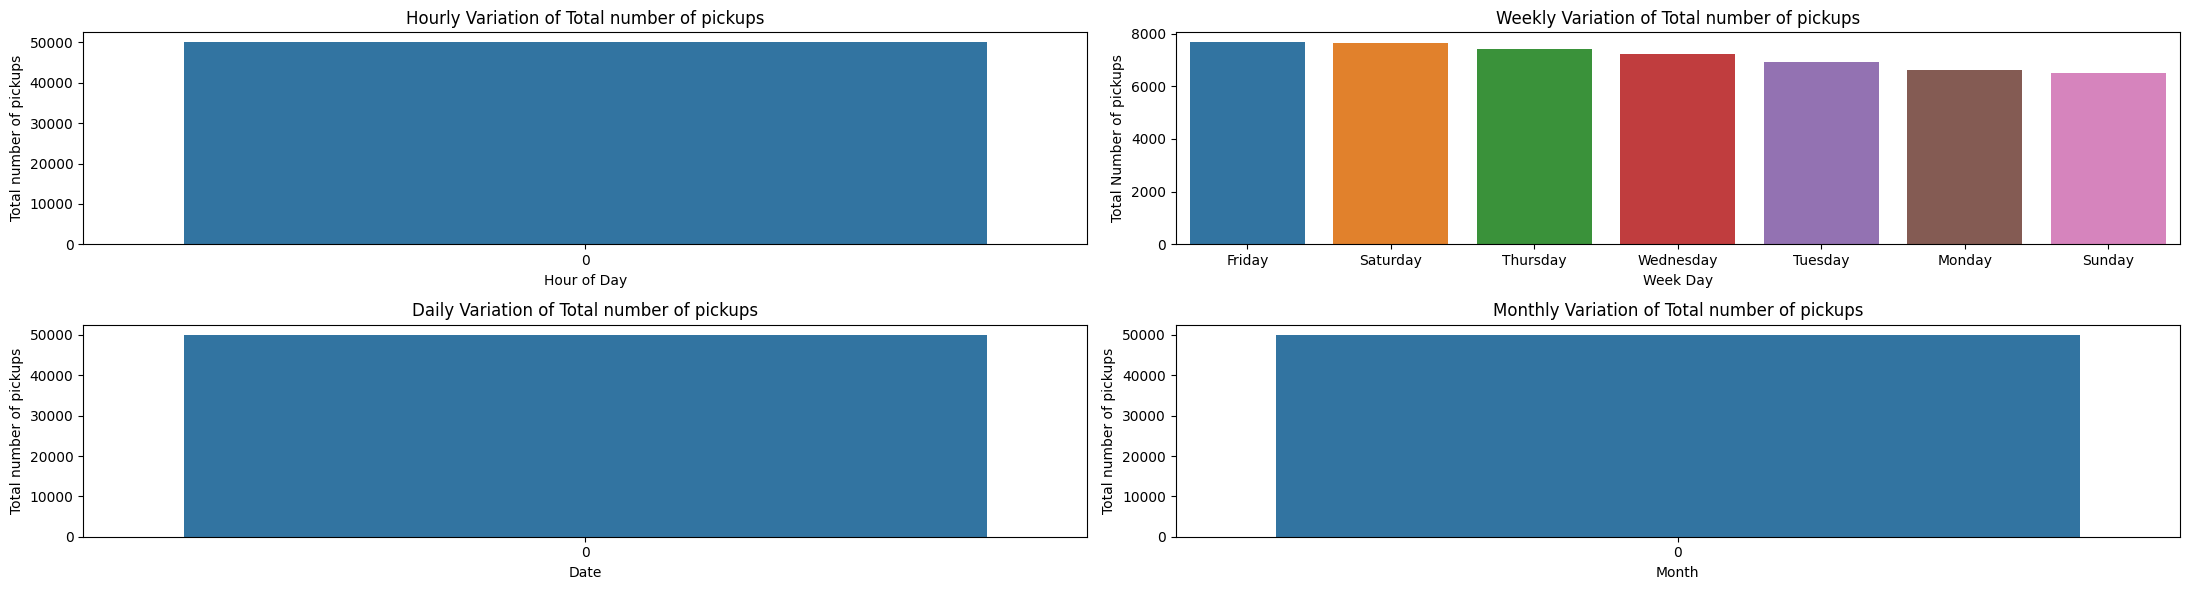

In [69]:

import matplotlib.pyplot as plt

# Convert pickup_weekday to pandas Series
weekday_counts = df['pickup_weekday'].value_counts()

plt.figure(figsize=(22, 6))

# Hour of day
plt.subplot(221)
sb.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')

# Date
plt.subplot(223)
sb.countplot(df['pickup_date'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Daily Variation of Total number of pickups')

# Day of week
plt.subplot(222)
sb.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

# Month
plt.subplot(224)
sb.countplot(df['pickup_month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')
plt.title('Monthly Variation of Total number of pickups')

plt.tight_layout()
plt.show()


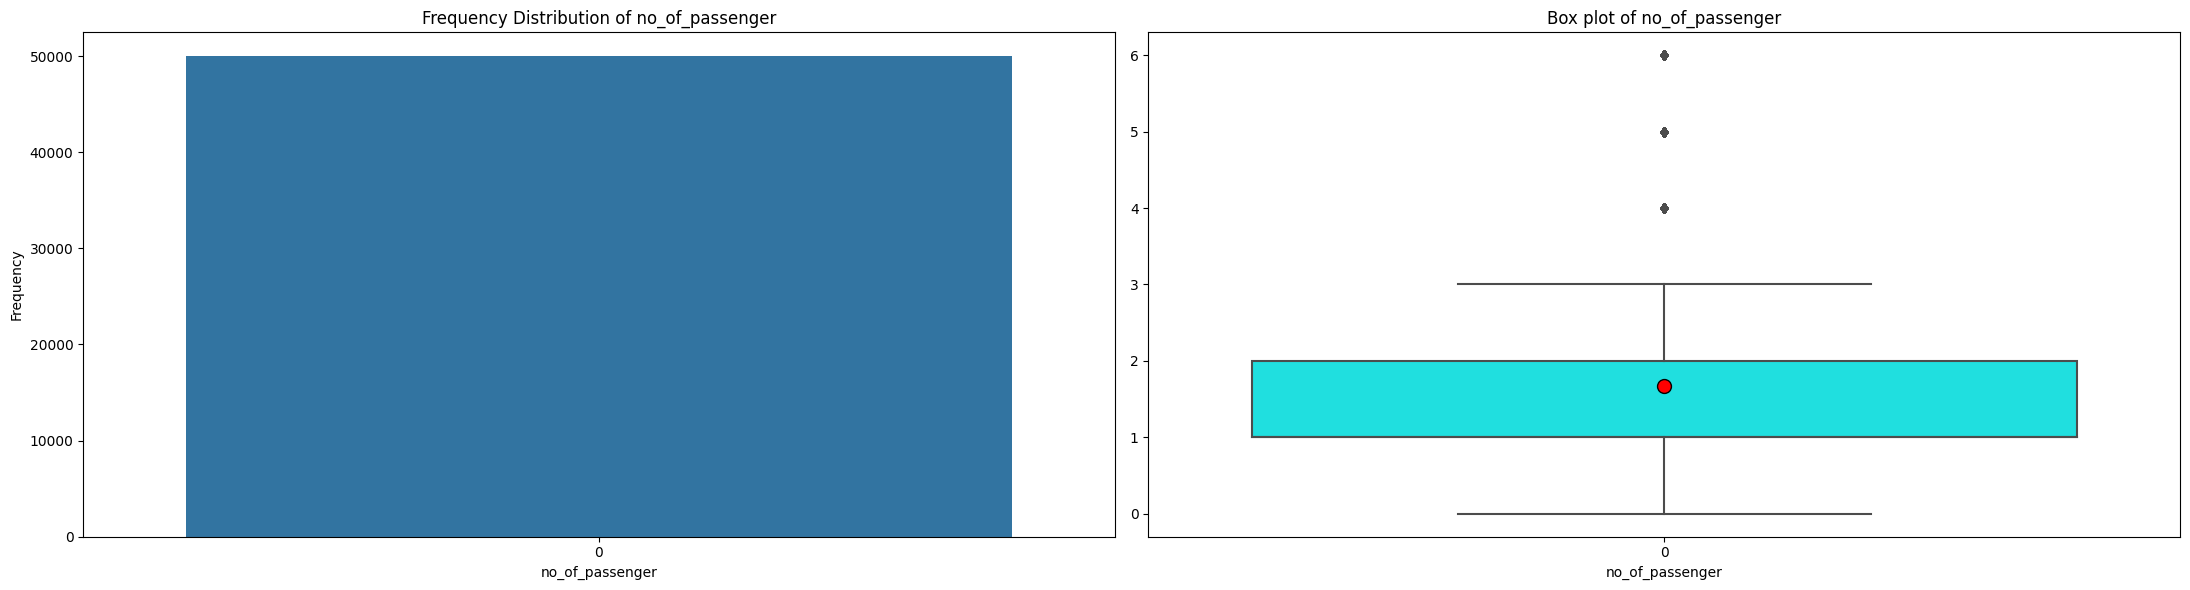

In [70]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 6))

# Frequency Distribution of Passenger Count
plt.subplot(121)
sb.countplot(df['no_of_passenger'])
plt.xlabel('no_of_passenger')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of no_of_passenger')

# Box plot of Passenger Count
plt.subplot(122)
sb.boxplot(df['no_of_passenger'], color='cyan', showmeans=True, 
           meanprops={"marker": "o", "markerfacecolor": "Red", 
                      "markeredgecolor": "black", "markersize": "10"})
plt.xlabel('no_of_passenger')
plt.title('Box plot of no_of_passenger')

plt.tight_layout()
plt.show()


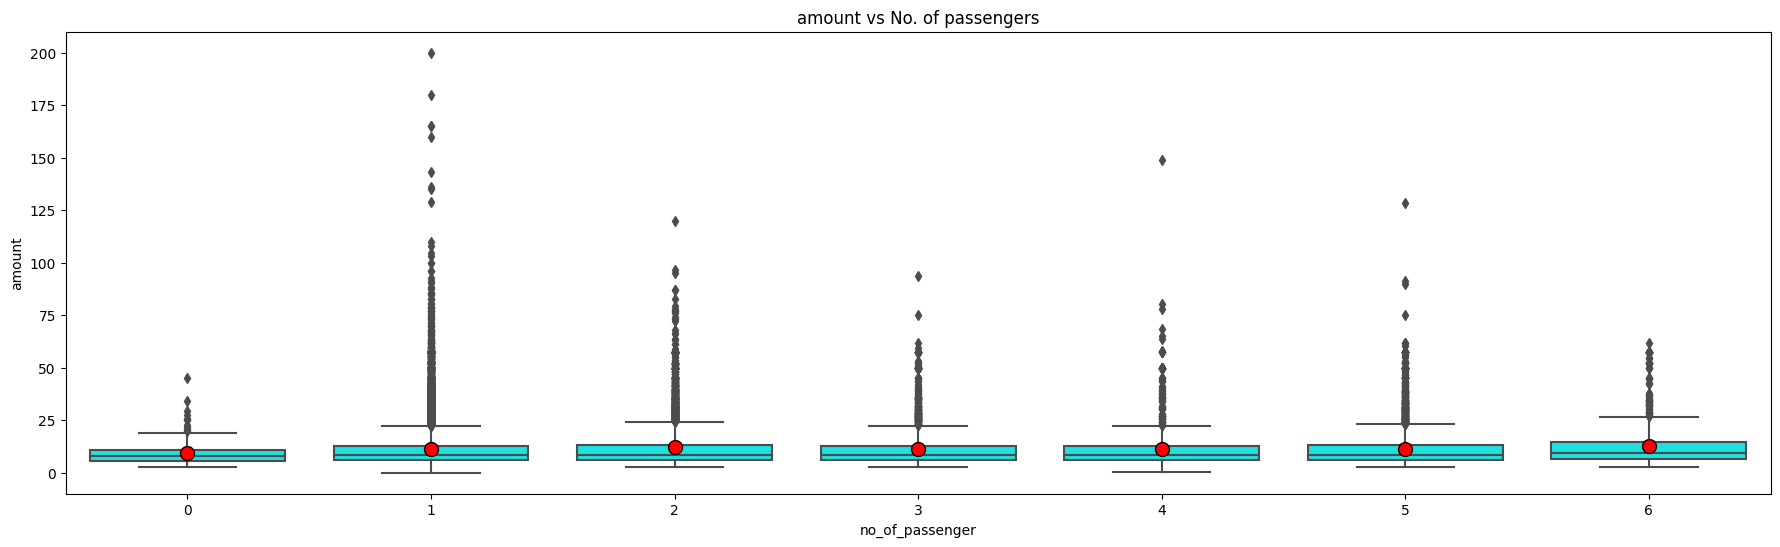

In [71]:
plt.figure(figsize=(22, 6))
sb.boxplot(x = df['no_of_passenger'],y = df['amount'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('no_of_passenger')
plt.title ("amount vs No. of passengers");

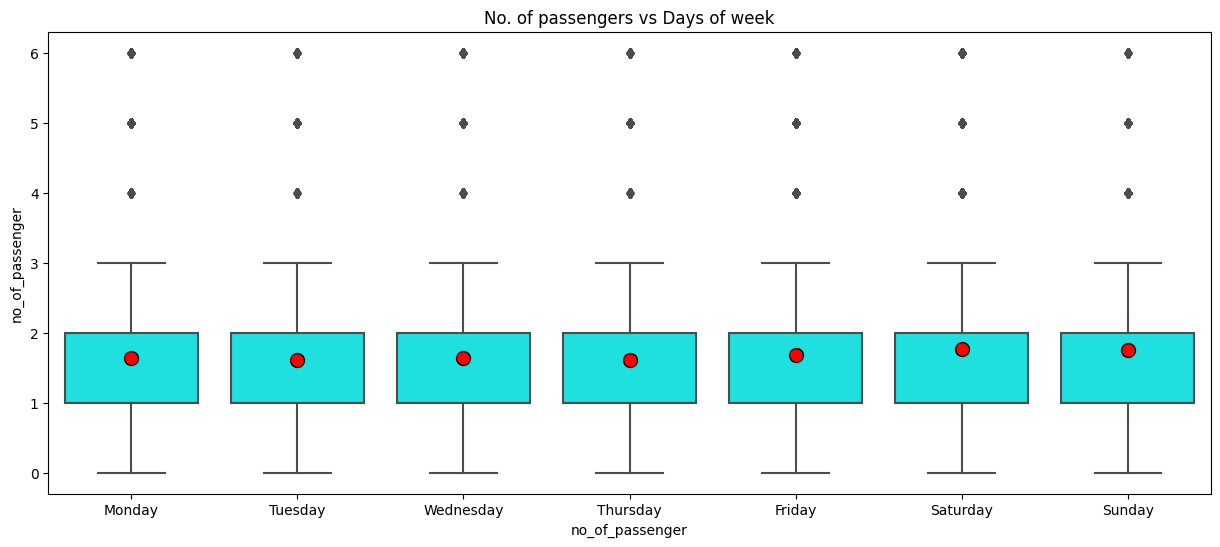

In [72]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],y = df['no_of_passenger'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('no_of_passenger')
plt.title ("No. of passengers vs Days of week");

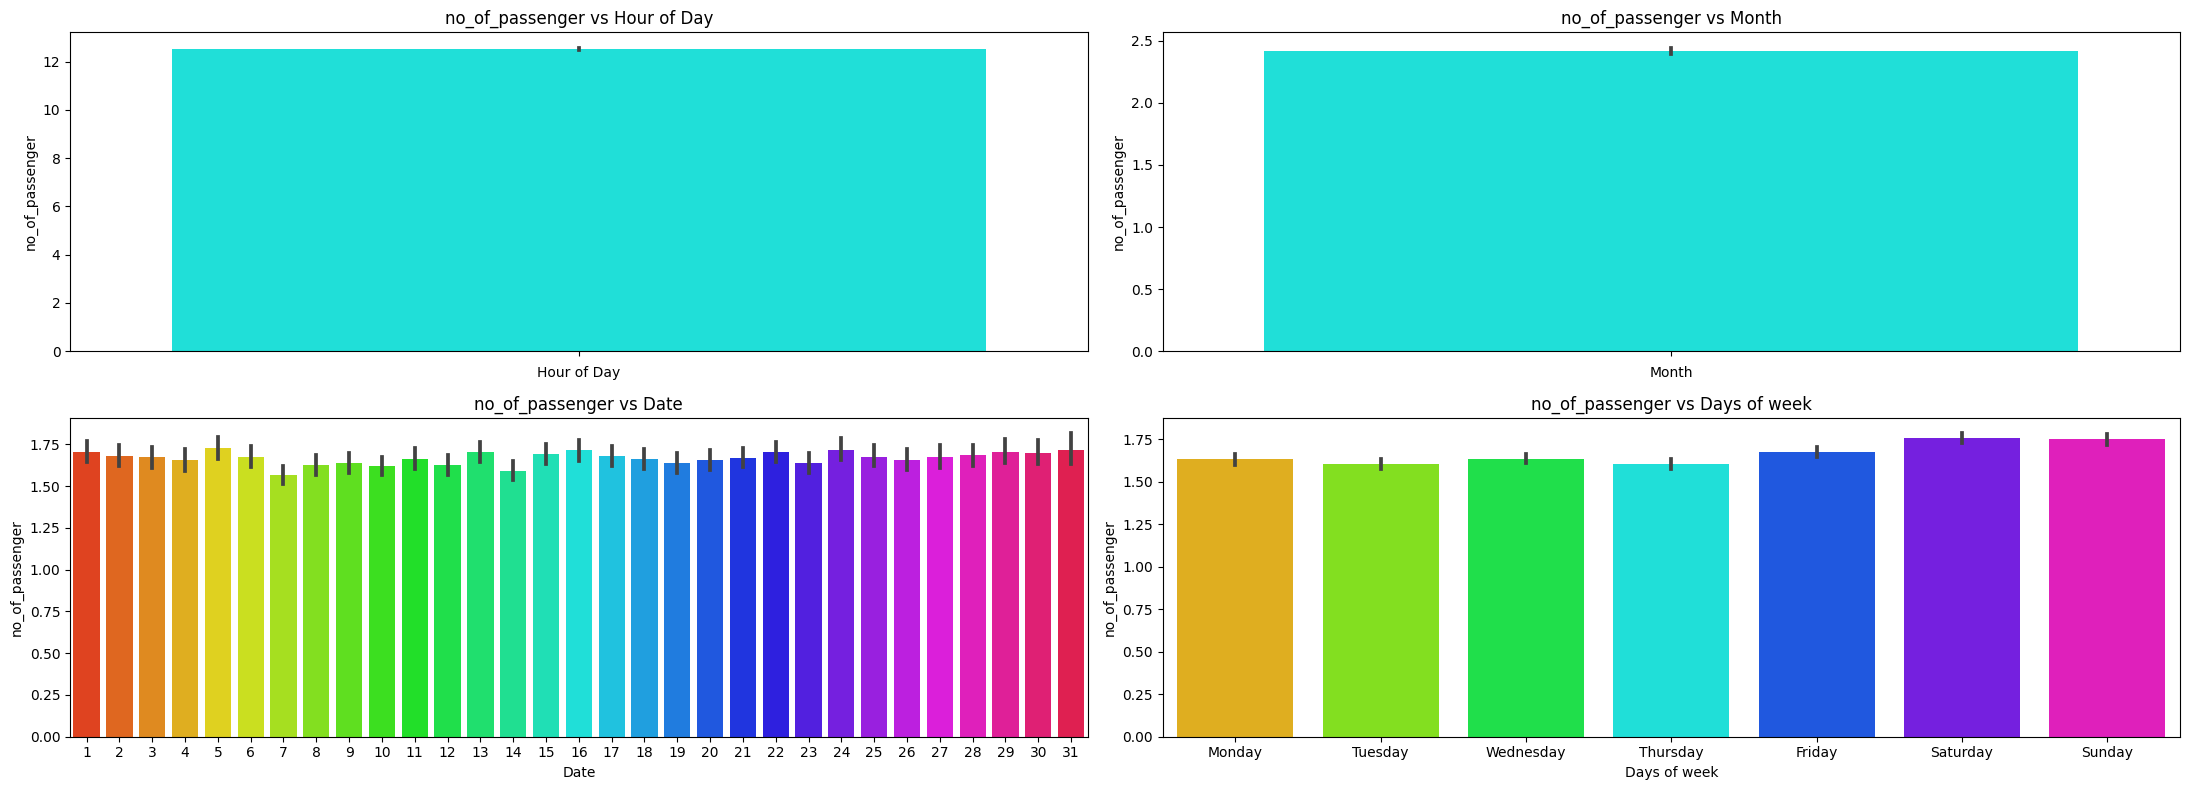

In [73]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.barplot(df['pickup_hour'], y = df['no_of_passenger'], palette = 'hsv')
plt.xlabel('Hour of Day')
plt.ylabel('no_of_passenger')
plt.title ("no_of_passenger vs Hour of Day")

# Day of week
plt.subplot(222)
sb.barplot(df['pickup_month'], y = df['no_of_passenger'],palette = 'hsv')
plt.xlabel('Month')
plt.ylabel('no_of_passenger')
plt.title ("no_of_passenger vs Month")

# Date
plt.subplot(223)
sb.barplot(x = df['pickup_date'], y = df['no_of_passenger'], palette = 'hsv')
plt.xlabel('Date')
plt.ylabel('no_of_passenger')
plt.title ("no_of_passenger vs Date")

# Month
plt.subplot(224)
sb.barplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['no_of_passenger'], palette = 'hsv')
plt.xlabel('Days of week')
plt.ylabel('no_of_passenger')
plt.title ("no_of_passenger vs Days of week")
plt.tight_layout();

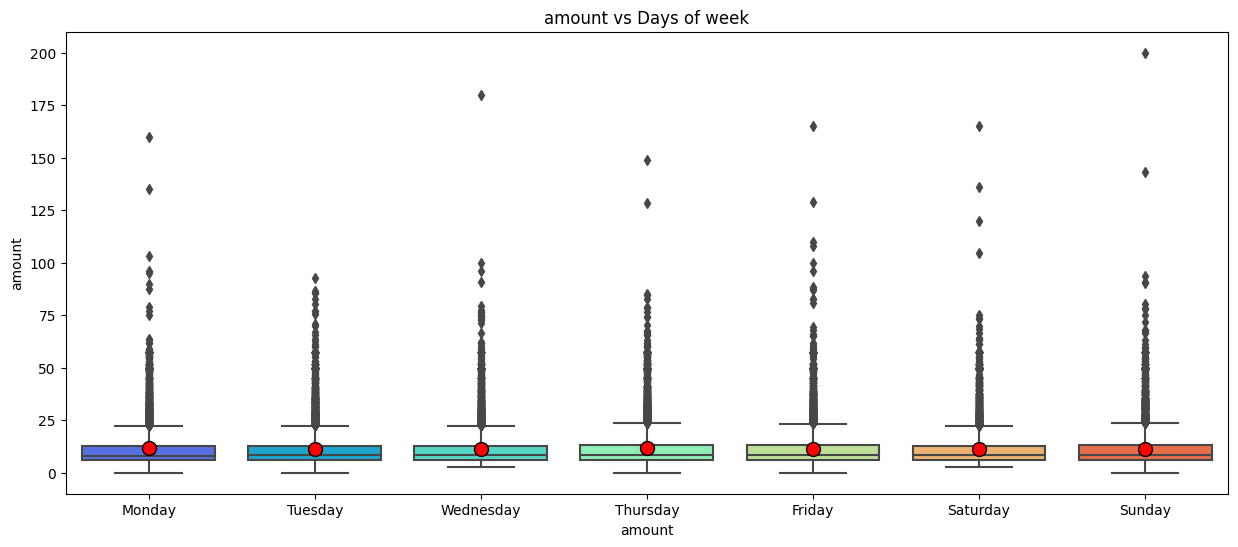

In [74]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['amount'], palette = 'rainbow', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black",
                       "markersize":"10"}
)
plt.xlabel('amount')
plt.title ("amount vs Days of week");

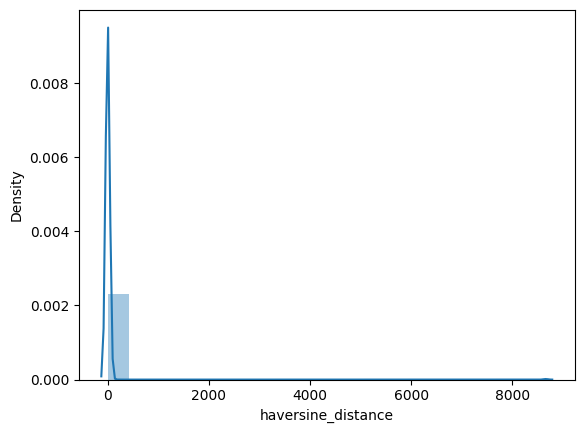

In [75]:
sb.distplot(df['haversine_distance'], bins = 20);

In [76]:
df['haversine_distance'].describe(), print("Median       ", df['haversine_distance'].median())

Median        2.120114184225849


(count    50000.000000
 mean        18.508946
 std        355.564309
 min          0.000000
 25%          1.223146
 50%          2.120114
 75%          3.895570
 max       8667.818812
 Name: haversine_distance, dtype: float64,
 None)

In [77]:
df['haversine_distance'].quantile(0.25), df['haversine_distance'].quantile(0.75)

(1.223145759662184, 3.8955700723072786)

In [78]:
IQR = df['haversine_distance'].quantile(0.75) - df['haversine_distance'].quantile(0.25)
IQR

2.6724243126450946

In [79]:
Q1 = df['haversine_distance'].quantile(0.25)
Q3 = df['haversine_distance'].quantile(0.75)
whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-2.7854907093054577, 7.90420654127492)

In [80]:
df = df.loc[(df['haversine_distance']!=0) & (df['haversine_distance']<8)]
df.shape

(44372, 16)

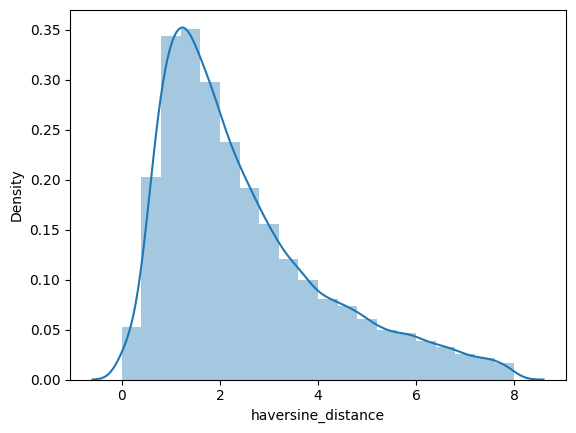

In [81]:
sb.distplot(df['haversine_distance'], bins = 20)
plt.show()

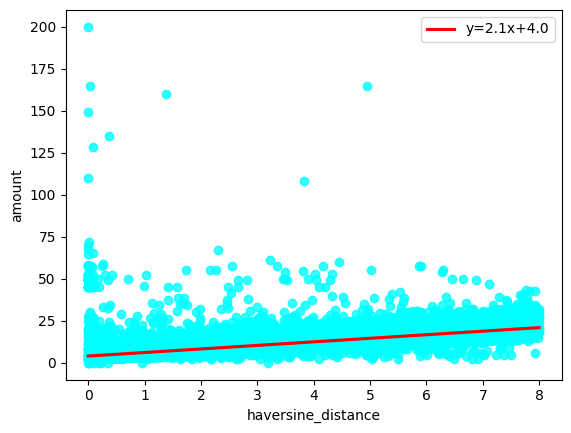

In [82]:
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

x = df['haversine_distance']
y = df['amount']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

ax = sb.regplot(x=x, y=y, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope, intercept),
                                    'color': 'red'}, scatter_kws={'color': 'cyan'})
ax.legend()

plt.show()


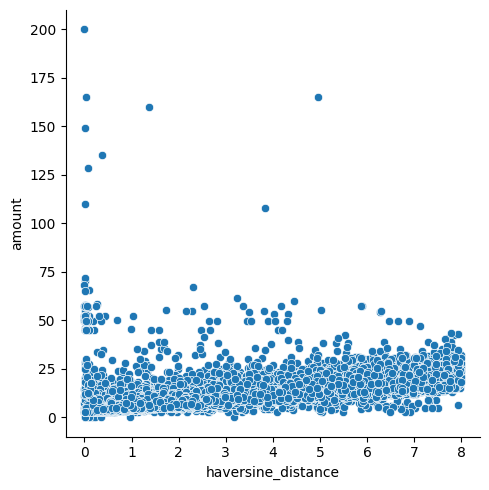

In [83]:
#sb.lmplot(x="haversine_distance", y="fare_amount", data=df );
sb.relplot(x="haversine_distance", y="amount", data=df, kind="scatter");

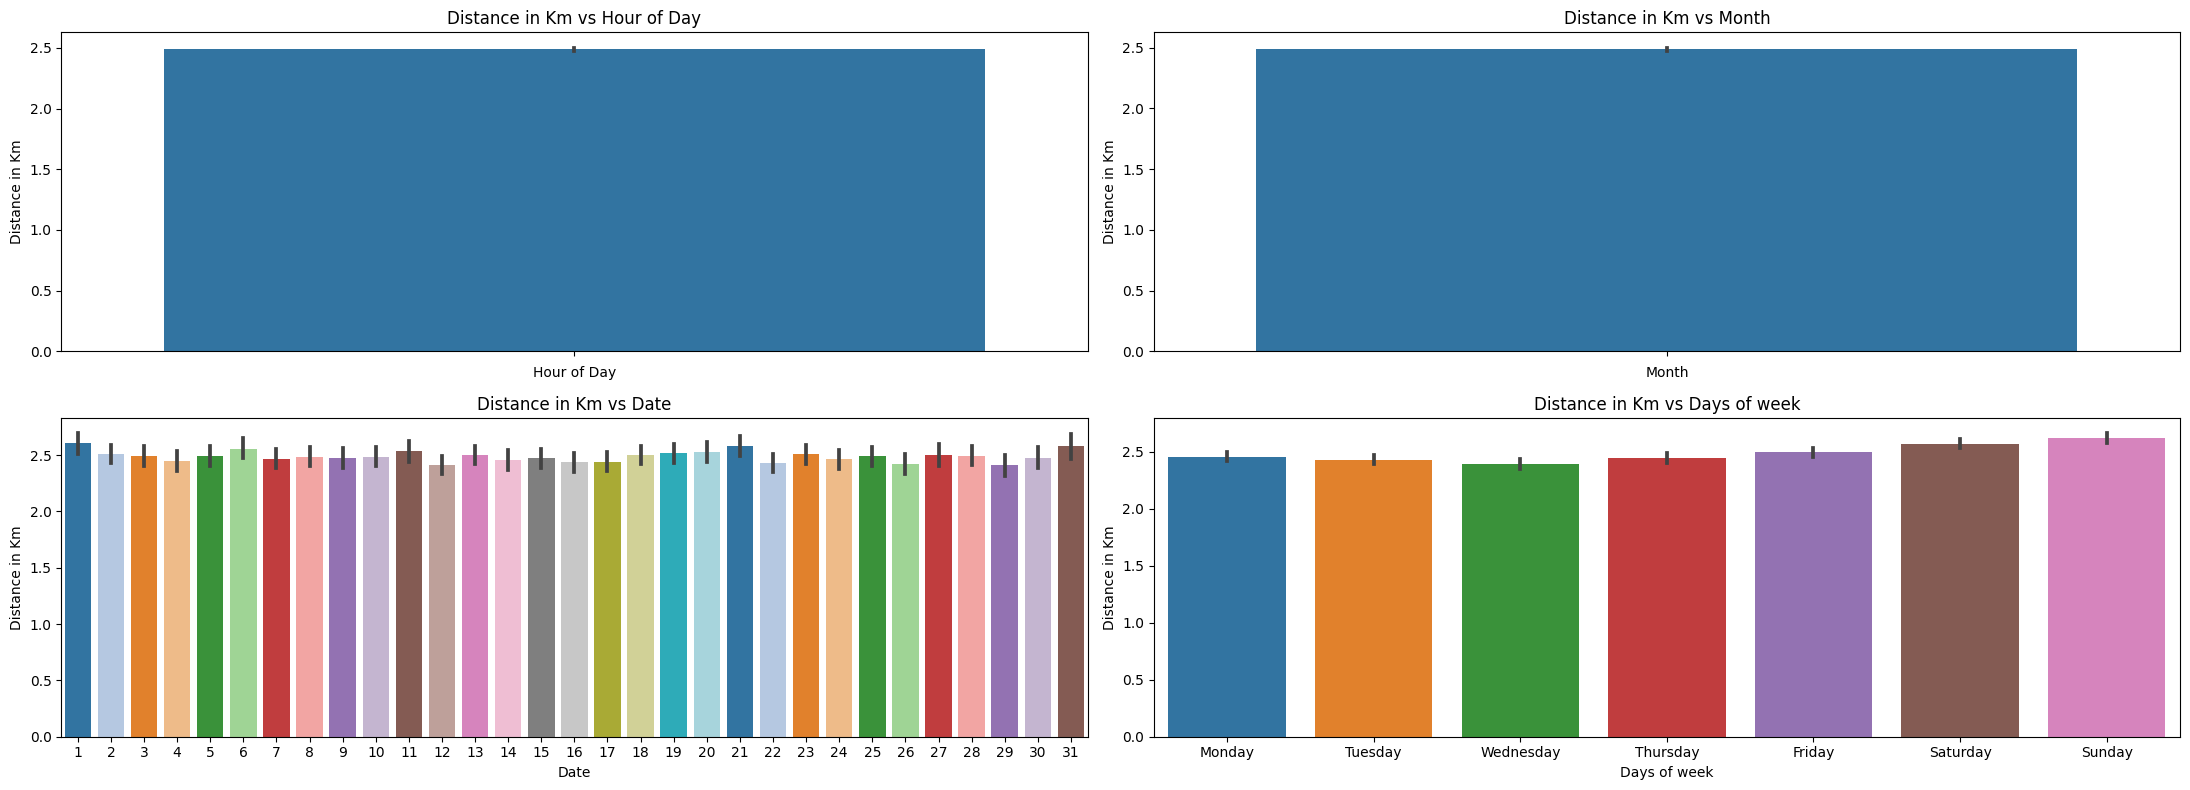

In [84]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.barplot(df['pickup_hour'], y = df['haversine_distance'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Hour of Day")

# Day of week
plt.subplot(222)
sb.barplot(df['pickup_month'], y = df['haversine_distance'],palette = 'tab20',estimator = np.mean)
plt.xlabel('Month')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Month")

# Date
plt.subplot(223)
sb.barplot(x = df['pickup_date'], y = df['haversine_distance'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Date")

# Month
plt.subplot(224)
sb.barplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['haversine_distance'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Days of week")
plt.tight_layout();


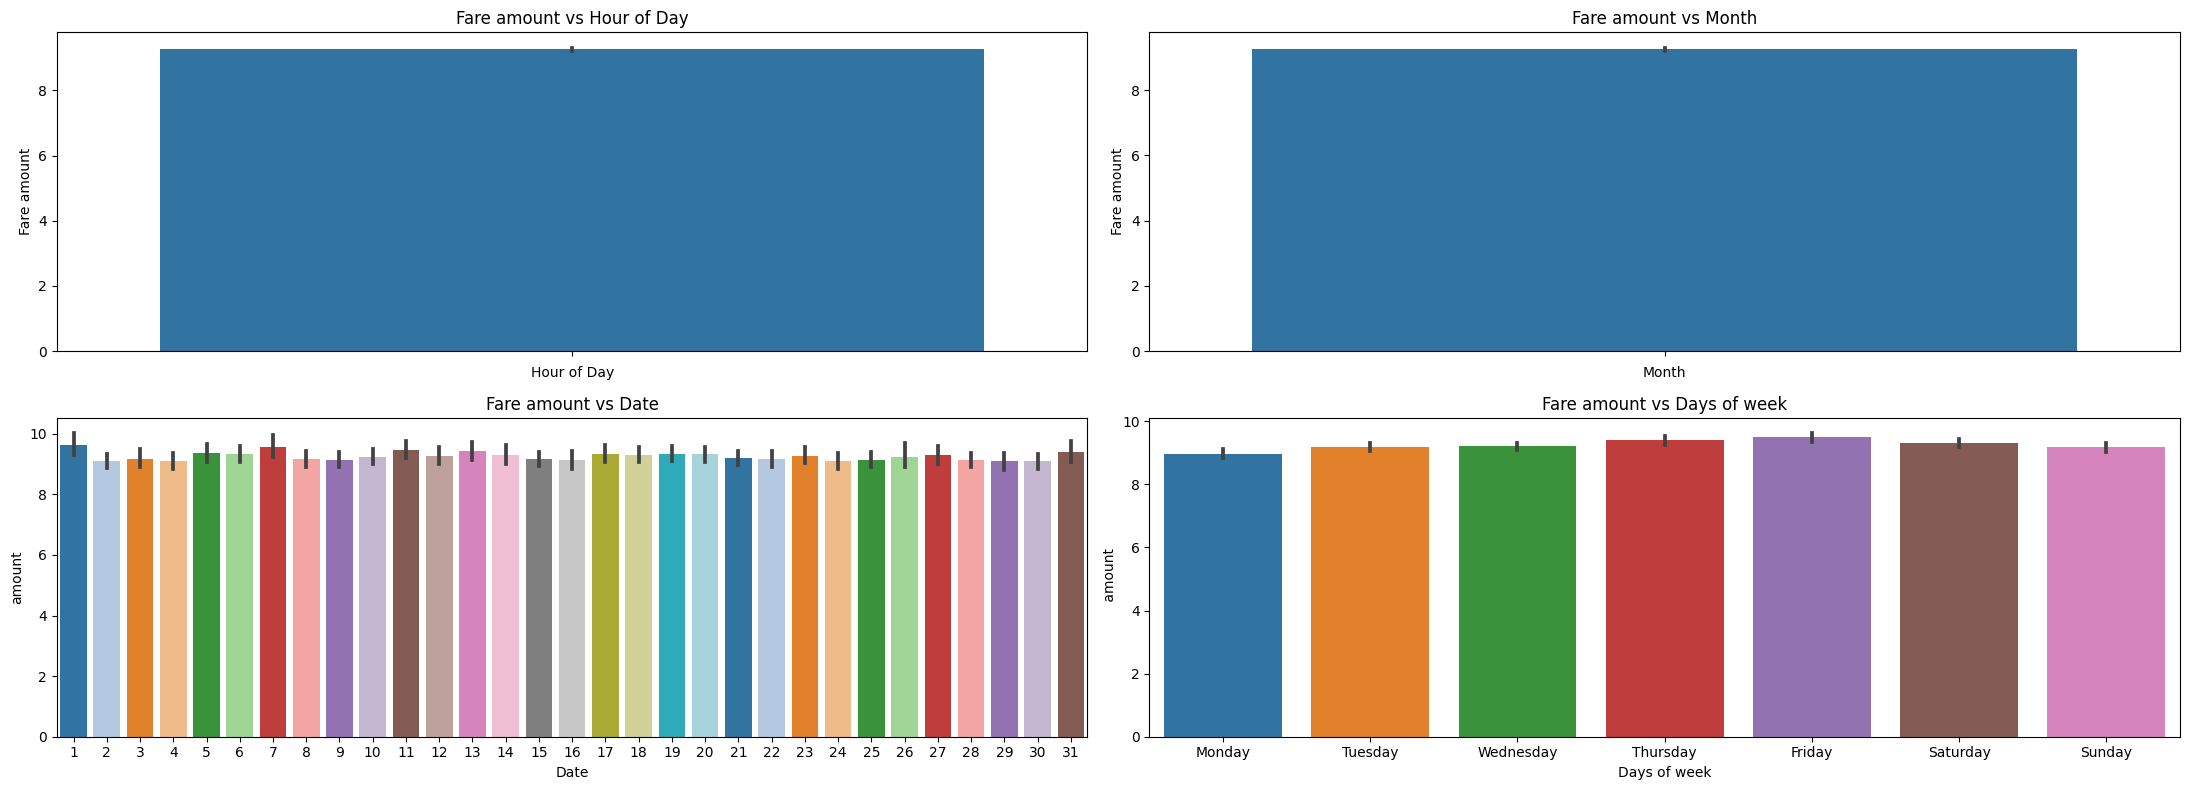

In [85]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.barplot(df['pickup_hour'], y = df['amount'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Fare amount')
plt.title ("Fare amount vs Hour of Day")

# Day of week
plt.subplot(222)
sb.barplot(df['pickup_month'], y = df['amount'],palette = 'tab20')
plt.xlabel('Month')
plt.ylabel('Fare amount')
plt.title ("Fare amount vs Month")

# Date
plt.subplot(223)
sb.barplot(x = df['pickup_date'], y = df['amount'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('amount')
plt.title ("Fare amount vs Date")

# Month
plt.subplot(224)
sb.barplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['amount'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel(' amount')
plt.title ("Fare amount vs Days of week")
plt.tight_layout();

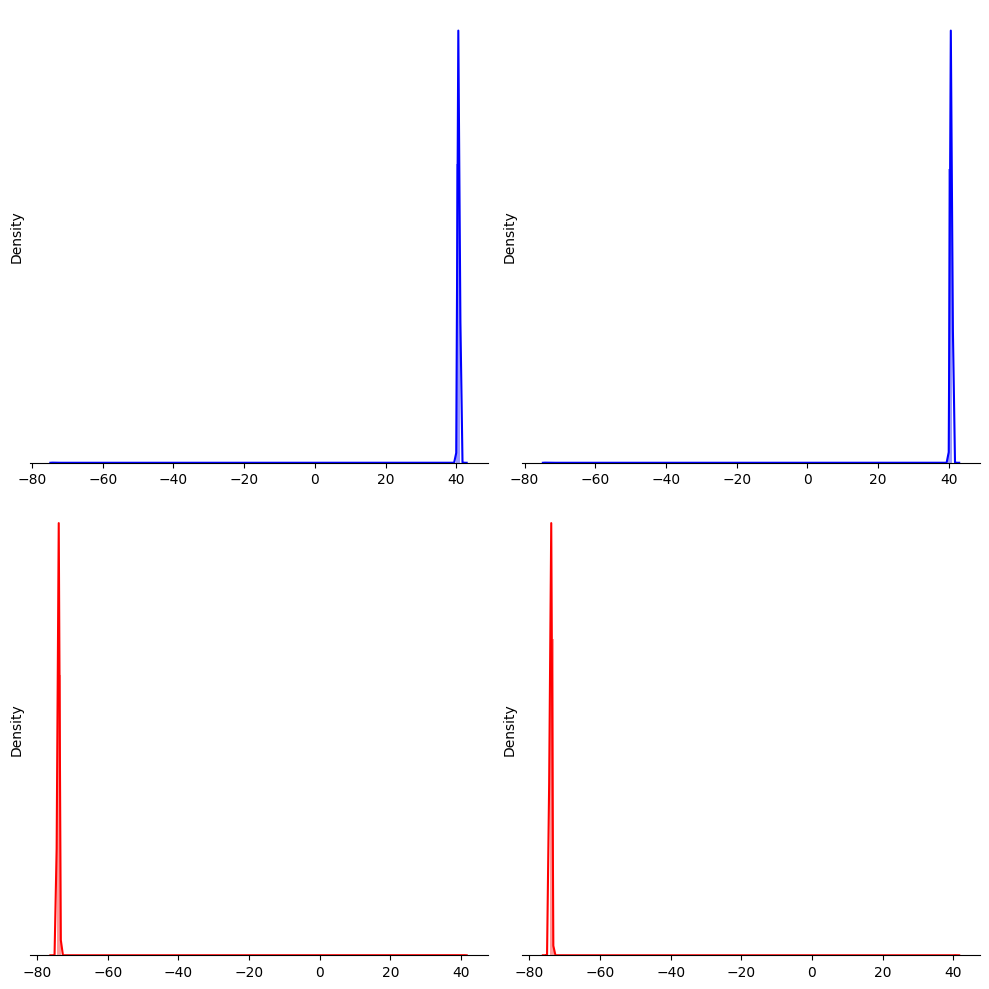

In [86]:
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sb.despine(left=True)
sb.distplot(df['latitude_of_pickup'].values, label = 'latitude_of_pickup',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df['longitude_of_pickup'].values, label = 'longitude_of_pickup',color="r",bins =100, ax=axes[1,0])
sb.distplot(df['latitude_of_dropoff'].values, label = 'latitude_of_dropoff',color="b",bins =100, ax=axes[0,1])
sb.distplot(df['longitude_of_dropoff'].values, label = 'longitude_of_dropoff',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

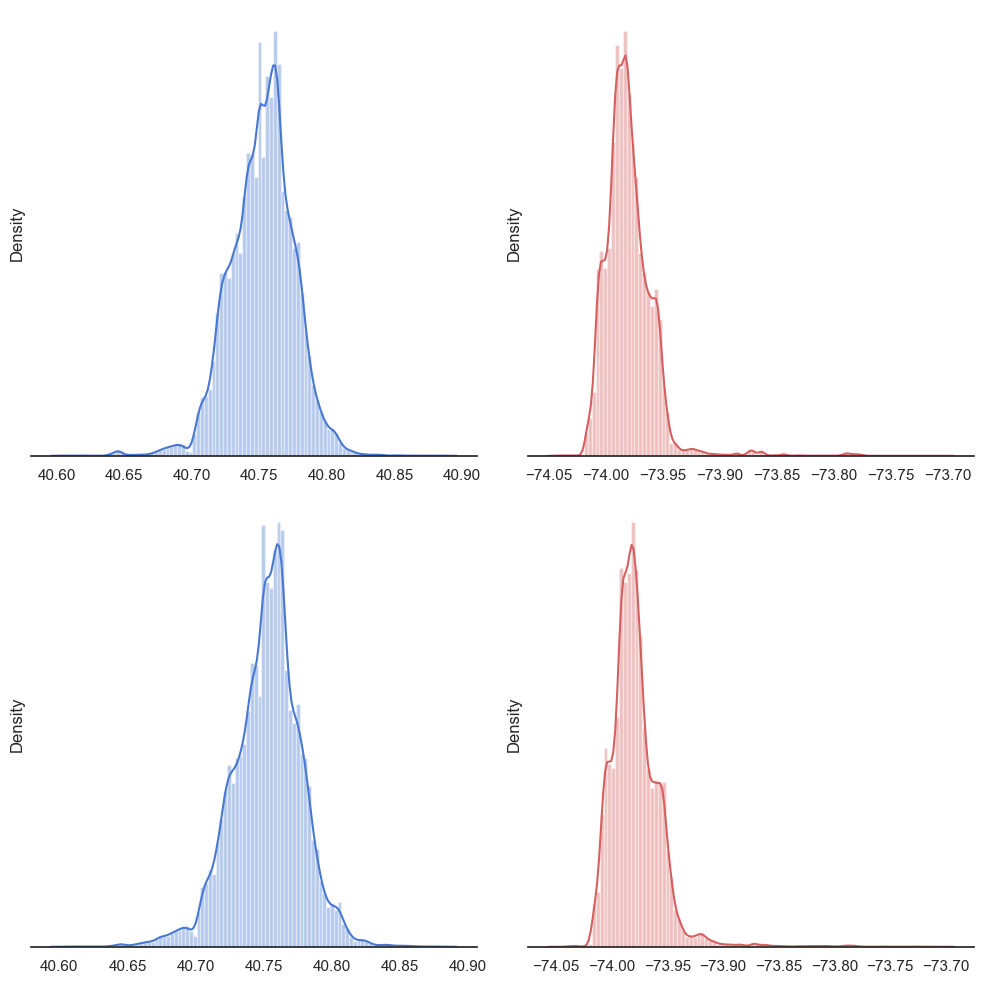

In [87]:
df = df.loc[(df['latitude_of_pickup'] > 40.6) & (df['latitude_of_pickup'] < 40.9)]
df = df.loc[(df['latitude_of_dropoff'] > 40.6) & (df['latitude_of_dropoff'] < 40.9)]
df = df.loc[(df['longitude_of_dropoff'] > -74.05) & (df['longitude_of_dropoff'] < -73.7)]
df = df.loc[(df['longitude_of_pickup'] > -74.05) & (df['longitude_of_pickup'] < -73.7)]
df_data_new = df.copy()
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False)
sb.despine(left=True)
sb.distplot(df_data_new['latitude_of_pickup'].values, label='latitude_of_pickup', color="b", bins=100, ax=axes[0, 0])
sb.distplot(df_data_new['longitude_of_pickup'].values, label='longitude_of_pickup', color="r", bins=100, ax=axes[0, 1])
sb.distplot(df_data_new['latitude_of_dropoff'].values, label='latitude_of_dropoff', color="b", bins=100, ax=axes[1, 0])
sb.distplot(df_data_new['longitude_of_dropoff'].values, label='longitude_of_dropoff', color="r", bins=100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()


In [88]:
!pip install holoviews


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
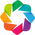

:Distribution   [amount]   (Density)

In [147]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
hv.Distribution(df['amount']).opts(title="Amount Distribution", color="red",
                                                        xlabel="Amount", ylabel="Density")\
.opts(opts.Distribution(width=700, height=300,tools=['hover'],show_grid=True))

In [91]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X =df.drop(['unique_id', 'date_time_of_pickup','pickup_weekday', 'amount', 'base_fare', 'fare'], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  
print(vif_data)

                feature           VIF
0   longitude_of_pickup  1.819478e+07
1    latitude_of_pickup  5.198902e+06
2  longitude_of_dropoff  1.859880e+07
3   latitude_of_dropoff  4.601945e+06
4       no_of_passenger  2.674810e+00
5           pickup_hour  5.455372e+00
6           pickup_date  4.268120e+00
7          pickup_month  4.271540e+00
8            pickup_day  3.468816e+00
9    haversine_distance  3.252047e+00


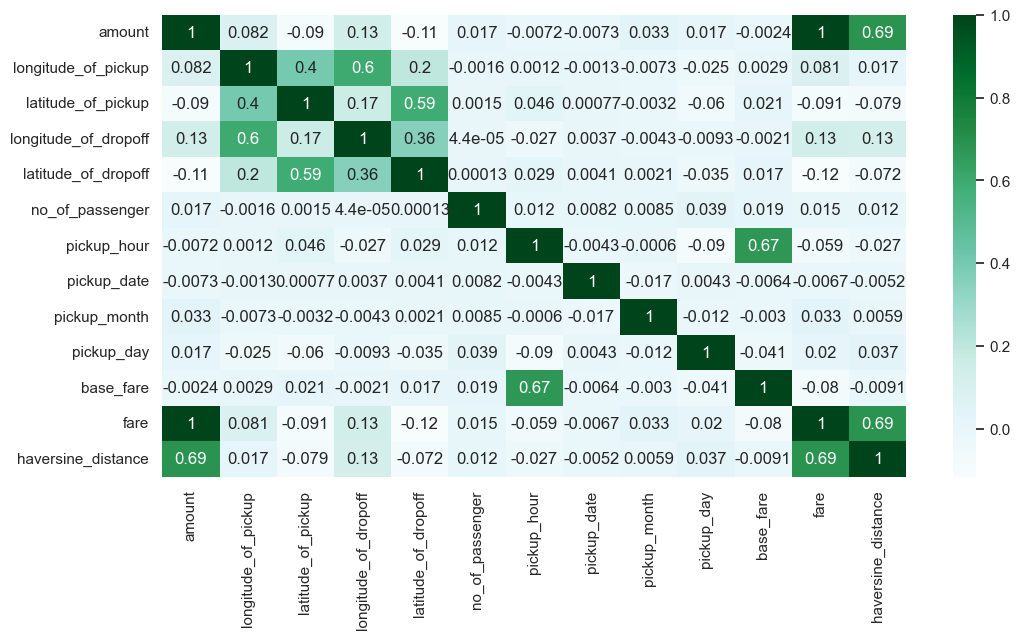

In [92]:
plt.figure(figsize = (12,6))
sb.heatmap(df.drop(['unique_id', 'date_time_of_pickup','pickup_weekday'], axis = 1).corr(), 
           cmap ='BuGn', annot = True);


In [93]:
df[['latitude_of_pickup', 'longitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']].corr()


,latitude_of_pickup,longitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff
latitude_of_pickup,1.000000,0.400111,0.167210,0.588866
longitude_of_pickup,0.400111,1.000000,0.595214,0.200362
longitude_of_dropoff,0.167210,0.595214,1.000000,0.356250
latitude_of_dropoff,0.588866,0.200362,0.356250,1.000000


# Data scaling & Train Test split

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44298 entries, 0 to 49998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             44298 non-null  object             
 1   amount                44298 non-null  float64            
 2   date_time_of_pickup   44298 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   44298 non-null  float64            
 4   latitude_of_pickup    44298 non-null  float64            
 5   longitude_of_dropoff  44298 non-null  float64            
 6   latitude_of_dropoff   44298 non-null  float64            
 7   no_of_passenger       44298 non-null  int64              
 8   pickup_hour           44298 non-null  int64              
 9   pickup_weekday        44298 non-null  object             
 10  pickup_date           44298 non-null  int64              
 11  pickup_month          44298 non-null  int64              
 12  pick

In [95]:
X = df.drop(['unique_id', 'date_time_of_pickup', 'pickup_weekday', 'amount', 'fare', 'base_fare', 'latitude_of_dropoff', 'longitude_of_dropoff'], axis=1)
y = df['amount']


In [96]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 6.24907707, -1.30979571, -0.51737493,  0.53242808, -0.07682702,
        -0.07663853, -1.55585662, -0.86466891],
       [-0.12832761,  0.3886703 ,  0.25724483, -2.09741316,  0.26925786,
         0.50048576, -0.01745682, -0.65186703],
       [-0.33066935, -0.80711337, -0.51737493, -1.47862699,  0.61534273,
        -0.65376283,  1.00814305,  0.18433352],
       [ 0.5462831 ,  0.67512781, -0.51737493, -1.01453736, -0.76899677,
        -0.94232497, -1.04305669, -0.29025962],
       [-0.96800901, -0.87143664, -0.51737493, -0.70514427, -1.11508164,
        -1.51944927, -0.01745682,  0.77035446]])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(31008, 8)
(31008,)
(13290, 8)
(13290,)


# Mean Prediction

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_pred = np.repeat(y_train.mean(),len(y_test))
sqrt(mean_squared_error(y_test, mean_pred))

5.311480397891527

# 7. Model Development


The following algorithms are going to be used to build regression models:

- Linear Regressor
- SGDRegressor
- Ridge Regressor
- Lasso Regressor
- ElasticNet Regressor
- KNeighbors Regressor
- Support Vector Regressor
- Decision Tree Regressor
- Extra Trees Regressor
- Isolation Forest Regressor
- Random Forest Regressor
- Bagging Regressor
- AdaBoost Regressor
- Gradient Boosting Regressor
- XGB Regressor
- CatBoost Regressor
- MLPRegressor

In [99]:
pip install -q --upgrade linear-tree

Note: you may need to restart the kernel to use updated packages.


# Cross Validation(CV)
Cross Validation(CV) or K-Fold Cross Validation (K-Fold CV) is used to generate multiple (k) train-test sets instead of 1. In a k fold cross-validation, the training data will be divided into k equal parts. In the first step, one part out of the k is set as validation data and the remaining k-1 as train data. This is repeated k times using a different part out of the k, each time to test the model upon. K-fold cross validation can essentially help to combat overfitting too. Different regression models can be evaluated based on the CV scores. The cross_val_score for regression calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

# Linear Regression

A linear relationship is one in which increment / decrement in one variable leads to the increment/decrement of the other. A Linear regression model expresses relationship between dependant and independant variables which can be demonstrated by a straight line.

- Y = mX + C is the equation of a straight line, where, Y is the dependent variable, X is the independent variable,
- C refers to the intercept of the regression line0, in other words: the value of Y when X is 0
- m refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit.

- Cost function of Linear Regression is Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) between the predicted value and the actual value. Lower the cost function better the model.

- Gradient descent is the optimization technique used by various supervised machine learning algorithms including Linear regression to minimize the cost function in order to get the best values of m and C. Gradient descent works iteratively calculating error at each term, moving in the direction of lower error by optimizing model parameters until model converges to minimal cost.
- We want gradient descent to reach the global minima of a convex cost function in order to get the optimal model. Random initialization and adjusting learning rate can help us in reaching the global minima of the function to find the best model.


Assumptions of Linear Regression:

- Linear Relationship between dependent and independent variables.
- Constant variance of error terms
- No correlation among independent variables,
- Errors normally distributed

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

0.5077979411830039

In [101]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lr, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)

df_train = df.drop(['unique_id', 'date_time_of_pickup', 'pickup_weekday', 'amount', 'fare', 'base_fare', 
                    'latitude_of_dropoff', 'longitude_of_dropoff'], axis=1)

coefficient = pd.DataFrame(Coefficient, columns=df_train.columns)
abs(coefficient.mean(axis=0)).sort_values(ascending=False)


haversine_distance     3.587795
longitude_of_pickup    0.535478
latitude_of_pickup     0.397482
pickup_month           0.154440
pickup_hour            0.055739
pickup_day             0.037762
no_of_passenger        0.034433
pickup_date            0.016002
dtype: float64

# Ridge Regression

A regression model that uses L2 regularization technique is called Ridge Regression. When more features are added to a linear regression model, it can lead to overfitting, where the model performs well on train but not on test dataset. Values of coefficients also get larger. In ridge regression, a regularization term, which is a sum of "squared magnitude" of all coefficients, is added as penalty to the cost function of linear regression algorithm. This decreases the coefficients values significantly and hence the effect of least significant features gets reduced.

Here, if regularization term, lambda is zero then the model get back to OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.



In [102]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5).fit(X_train, y_train)
ridge.score(X_train, y_train)

0.5092299688063376

In [103]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ridge, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)

coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance     3.586375
longitude_of_pickup    0.535224
latitude_of_pickup     0.397328
pickup_month           0.154384
pickup_hour            0.055672
pickup_day             0.037700
no_of_passenger        0.034434
pickup_date            0.016003
dtype: float64

# Lasso Regression

Lasso (Least Absolute Shrinkage and Selection Operator) regression is a type of linear regression similar to Ridge regression. In Lasso, L1 regularization, which is a sum of “absolute values of magnitude” of all coeffients are applied as a penalty to the cost function. In Ridge regression, coefficients go down, but none of them all the way up to zero. So there will be difficulty in interpretation because we still have the same number of parameters even though with less intensity. Compared to that, Lasso can give us less number of parameters or less number of features. Here some of coefficients are actually dropped from the model. Thus the key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

Again, if lambda is zero then the model get back to OLS whereas very large value will make coefficients zero hence it will under-fit.

In [104]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5).fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5092254256070239

In [105]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lasso, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)
coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance     3.584384
longitude_of_pickup    0.529093
latitude_of_pickup     0.390854
pickup_month           0.150742
pickup_hour            0.051893
pickup_day             0.033775
no_of_passenger        0.030401
pickup_date            0.012839
dtype: float64

# Elasticnet Regression

This is also a type of linear regression in which both Lasso (L1) and Ridge (L2) regularization parameters combined together are added to the cost function.

In [106]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(cv=5).fit(X_train, y_train)
elastic.score(X_train, y_train)

0.5092139242809246

In [107]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(elastic, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)
coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance     3.571742
longitude_of_pickup    0.527239
latitude_of_pickup     0.389913
pickup_month           0.150473
pickup_hour            0.051542
pickup_day             0.033466
no_of_passenger        0.030665
pickup_date            0.012857
dtype: float64

# Polynomial Regression

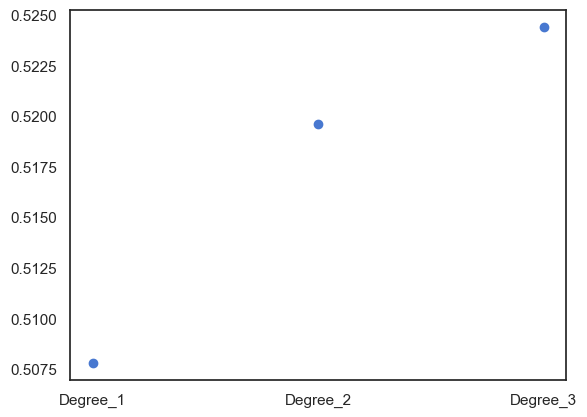

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
cv_score=[]
for i in range(1,4):
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg = LinearRegression()
    cv_score.append(np.mean(cross_val_score(poly_reg,X_poly,y_train,cv=5)))
x = range(1,4)
plt.scatter(x,cv_score)
plt.xticks(ticks=[1,2,3], labels=['Degree_1', 'Degree_2', 'Degree_3']);


In [109]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(poly_reg, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)
coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance     3.587795
longitude_of_pickup    0.535478
latitude_of_pickup     0.397482
pickup_month           0.154440
pickup_hour            0.055739
pickup_day             0.037762
no_of_passenger        0.034433
pickup_date            0.016002
dtype: float64

# K-Nearest Neighbor (KNN)

K- Nearest Neighbor (KNN), also known as Lazy learning algorithm observes the nature of nearest neighbors. KNN is a supervised ML algorithm. In the KNN algorithm, “K’ means the number of nearest neighbors the model will consider. If it is a classification problem then we assign a mode to the instance and if it is a regression problem then we assign a mean or median of the distances of K nearest neighbors to the new unknown variable. .

Determining value of K:

- Choose a range of values for k
- For each value, implement a KNN model
- Calculate error (Or, R_squared value) corresponding to each K value and plot it.

The elbow curve is used to find the value of k to be used in the model. The value of k where the error is minimum gets selected. R_squared value is inversely proportional to the error. Higher the R2 score better will be the model.

How to calculate the distance?

- Manhattan Distance: Sum of Absolute difference between the two points, across all dimensions.
- Euclidean Distance is the shortest distances between two points. It is the square root of sum of squares of distance between two points.
- Minkowski distance is a generalized version of the above distance calculations. It is the p-th root of sum of squares of distance between two points.
- Hamming distance is the total number of differences between two strings of identical length.

Hamming distance is used for categorical data whereas Manhattan distance and Euclidian distance are for continuous data.

Manhattan distances can be thought of as the sum of the sides of a right-angled triangle while Euclidean distances represent the hypotenuse of the triangle. Hence, Manhattan distances are usually larger than Euclidean distances. In the Minkowski equation, when p=2, we get our familar Euclidian distance (also referred to as the L2-norm or L2 Distance). When p equals 1 we get the Manhattan distance. Manhattan distances can also find them selves called L1 norm, L1 distance, and even LASSO.

As p tends to infinity we get another famous distance, the Chebyshev distance. Manhattan, Euclidean, Chebyshev, and Minkowski distances are part of the scikit-learn DistanceMetric class and can be used to tune regressors / classifiers such as KNN or clustering alogorithms such as DBSCAN.

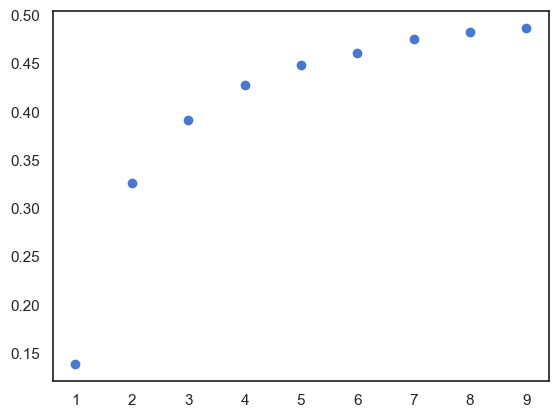

In [110]:
from sklearn.neighbors import KNeighborsRegressor
cv_score=[]
for i in range(1,10):
 knn = KNeighborsRegressor(n_neighbors= i)
 cv_score.append(np.mean(cross_val_score(knn,X_train, y_train,cv=5)))
x = range(1,10)
plt.scatter(x,cv_score);

# Decision Tree

A decision tree is a type of machine learning model that is used to predict the value of a target variable. Decision trees are created by splitting the data set into smaller and smaller subsets, in such a way that the resultamt nodes are as homogeneous as possible, until each subset contains only one data point. So the objective of the decision tree is to have pure nodes which contains 100% of one class and 0% of the other classes. When a sub node splits into further sub nodes, then it is known as decision nodes. The terminal node (or leaves) lies at the bottom of the decision tree. It has no further nodes coming off. The distance between parent root node and the longest terminal leaf nodes is called the depth of the tree.

Decision tree splits the nodes on all available variables. It selects the split which results in most homogeneous sub-nodes. The best split is decided based on Gini impurity, Chi-Square, Entropy / Information Gain or reduction in variance. The first three parameters are used when target variable is categorical and reduction in variance is uded for continuous variable.

Decision tree regression using reduction in variance selects the split with lower variance. It calculate the variance at each split as weighted average variance of each child node. A node having high variance means it is more impure. Since we seek the pure nodes after splitting the variable having low variance should be selected for splitting.

Optimizing parameters:

Minimum samples for a node split

a. Higher values controls overfitting

b. Too high values can lead to underfitting

Minimum samples for a terminal node

a. Higher values controls overfitting

b. Too high values can lead to underfitting

Maximum depth of tree

a. Higher depth can lead to overfitting

b.Lower depth can lead to underfitting

Maximum number of terminal nodes

In [111]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
R_Squared = np.mean(cross_val_score(DT, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(DT, X_train, y_train, cv=5))
print('R2 of Decision Tree Regression model is:',R_Squared)
print('Standard deviation of R2 of Decision Tree Regression model is:',Standard_deviation)

R2 of Decision Tree Regression model is: 0.0901029998588067
Standard deviation of R2 of Decision Tree Regression model is: 0.05316056390884627


In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
R_Squared = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(rf, X_train, y_train, cv=5))
print('R2 of Random Forest Regression model is:',R_Squared)
print('Standard deviation of R2 of Random Forest Regression model is:',Standard_deviation)

R2 of Random Forest Regression model is: 0.5313725940016568
Standard deviation of R2 of Random Forest Regression model is: 0.026224471153236402


# Gradient boosting Regression


Most machine learning models focus on minimizing the prediction error, therby improving the prediction power done by a single model. However, boosting algorithms improve the quality of prediction by training a series of weak models on different subsets of the data, each compensating the weaknesses of its predecessors and then combining the predictions of these models to create a final prediction that is more accurate than the predictions of any individual model.

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
np.mean(cross_val_score(GB, X_train, y_train, cv=5))

0.5407515566545167

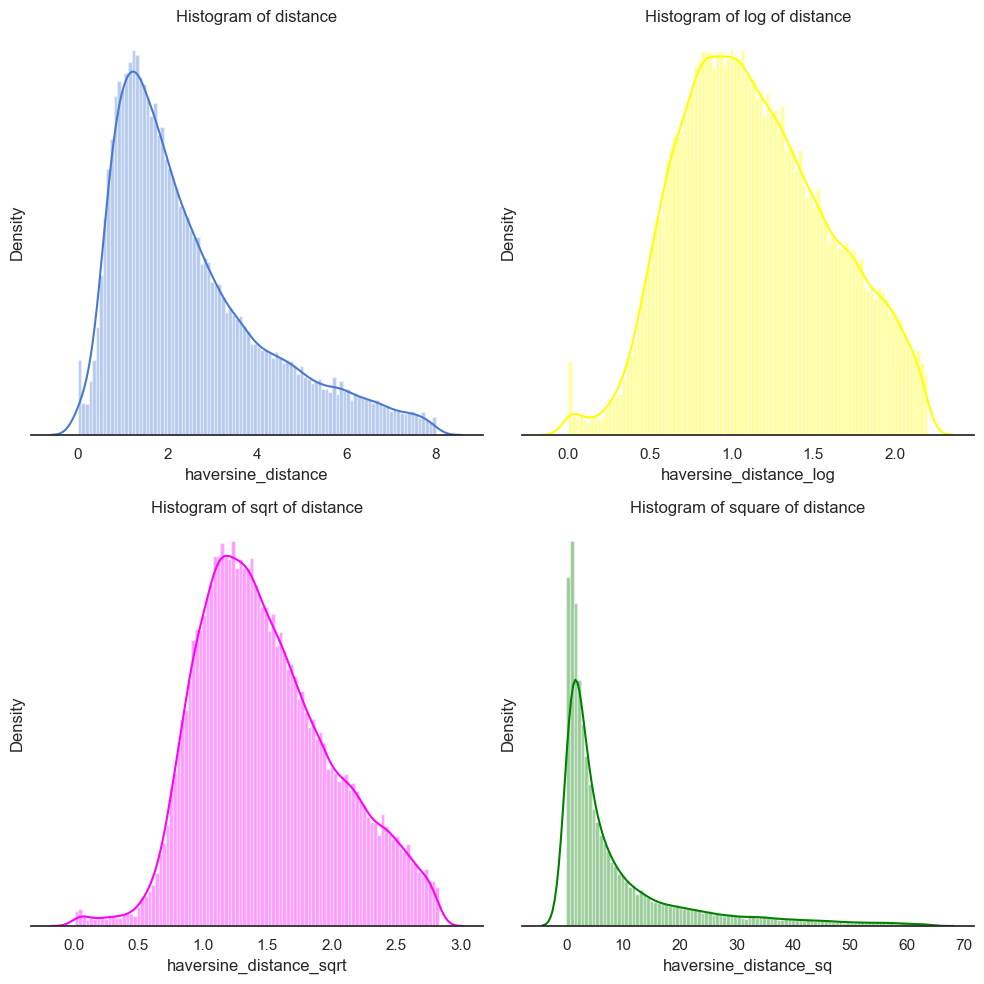

In [114]:
df['haversine_distance_log'] = np.log(df['haversine_distance'].values + 1)
df['haversine_distance_sqrt'] = np.sqrt(df['haversine_distance'].values)
df['haversine_distance_sq'] = df['haversine_distance'].values**2
df_test['haversine_distance_log'] = np.log(df_test['haversine_distance'].values + 1)
df_test['haversine_distance_sqrt'] = np.sqrt(df_test['haversine_distance'].values)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(df['haversine_distance'], label = 'haversine_distance',color="b",bins = 100, ax=axes[0,0])
axes[0,0].set_title('Histogram of distance')
sb.distplot(df['haversine_distance_log'], label = 'haversine_distance_log',color="yellow",bins =100, ax=axes[0,1])
axes[0,1].set_title('Histogram of log of distance')
sb.distplot(df['haversine_distance_sqrt'], label = 'haversine_distance_sqrt',color="magenta",bins =100, ax=axes[1, 0])
axes[1,0].set_title('Histogram of sqrt of distance')
sb.distplot(df['haversine_distance_sq'], label = 'haversine_distance_sq',color="green",bins =100, ax=axes[1, 1])
axes[1,1].set_title('Histogram of square of distance')
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [115]:
df_train = df.drop(['unique_id', 'date_time_of_pickup','pickup_weekday', 'fare', 'amount', 'base_fare',
                    'haversine_distance', 'haversine_distance_sq', 'haversine_distance_sqrt'], axis = 1)
df_test_copy = df_test.drop(['unique_id', 'base_fare', 'date_time_of_pickup','pickup_weekday', 'base_fare','haversine_distance', 
                             'haversine_distance_sqrt'], axis = 1)
#df_test_copy = df_test.drop(['key', 'base_fare', 'pickup_datetime','pickup_weekday', 'base_fare','haversine_distance', 'haversine_distance_sqrt','pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' ], axis = 1)
X = df_train.copy()
y = df['amount']
df_train.columns, df_test_copy.columns

(Index(['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff',
        'latitude_of_dropoff', 'no_of_passenger', 'pickup_hour', 'pickup_date',
        'pickup_month', 'pickup_day', 'haversine_distance_log'],
       dtype='object'),
 Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
        'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
        'pickup_hour', 'pickup_date', 'pickup_month', 'pickup_day',
        'haversine_distance_log'],
       dtype='object'))

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd

scaler = StandardScaler()
X = scaler.fit_transform(X)
test_X = scaler.transform(df_test_copy.iloc[:, :10])  # Adjust the column range as per your data

# Ensure the column names in df_train and df_test_copy match
df_test_copy = df_test_copy.rename(columns={'original_column_name': 'new_column_name'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

cv_results = cross_validate(ridge, X_train, y_train, cv=5, return_estimator=True)

coefficients = []
for model in cv_results['estimator']:
    coefficients.append(model.coef_)

coefficient = pd.DataFrame(coefficients, columns=df_train.columns)
abs(coefficient.mean(axis=0)).sort_values(ascending=False)


haversine_distance_log    3.333271
latitude_of_dropoff       0.495010
longitude_of_dropoff      0.324538
longitude_of_pickup       0.322675
pickup_month              0.152117
latitude_of_pickup        0.105853
pickup_hour               0.038693
pickup_date               0.035832
no_of_passenger           0.033659
pickup_day                0.030210
dtype: float64

In [118]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5).fit(X_train, y_train)
ridge.score(X_train, y_train)

0.4486440392959048

In [119]:
df_test.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,base_fare,haversine_distance,haversine_distance_log,haversine_distance_sqrt
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,6,0,3.5,1.030764,0.708412,1.015265
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,1,3.5,8.450134,2.246029,2.906911
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,8,3,2.5,1.389525,0.871095,1.178781
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,4,5,2.5,2.799270,1.334809,1.673102
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,3,1,2.5,1.999157,1.098331,1.413915


# 8. Model Evaluation & Kaggle Submission

In [120]:
def model_train_evaluation(y, ypred, model_name): 
       
    # Model Evaluation metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
    print("\n \n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('Mean absolute percentage error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')
    
    # Actual vs Predicted Plot
    f, ax = plt.subplots(figsize=(12,6),dpi=100);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel(' amount')
    plt.ylabel('amount')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
    f.text(0.95, 0.06, 'AUTHOR: BADAVATH SRIKANTH',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
    plt.show()


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear regression Model : 2.078096140002256
Mean Squared Error(MSE) of Linear regression Model : 15.841583072259358
Root Mean Squared Error (RMSE) of Linear regression Model : 3.9801486243932347
Mean absolute percentage error (MAPE) of Linear regression Model : 0.23473420369761203
Explained Variance Score (EVS) of Linear regression Model : 0.43325416027662667
R2 of Linear regression Model : 0.43

 



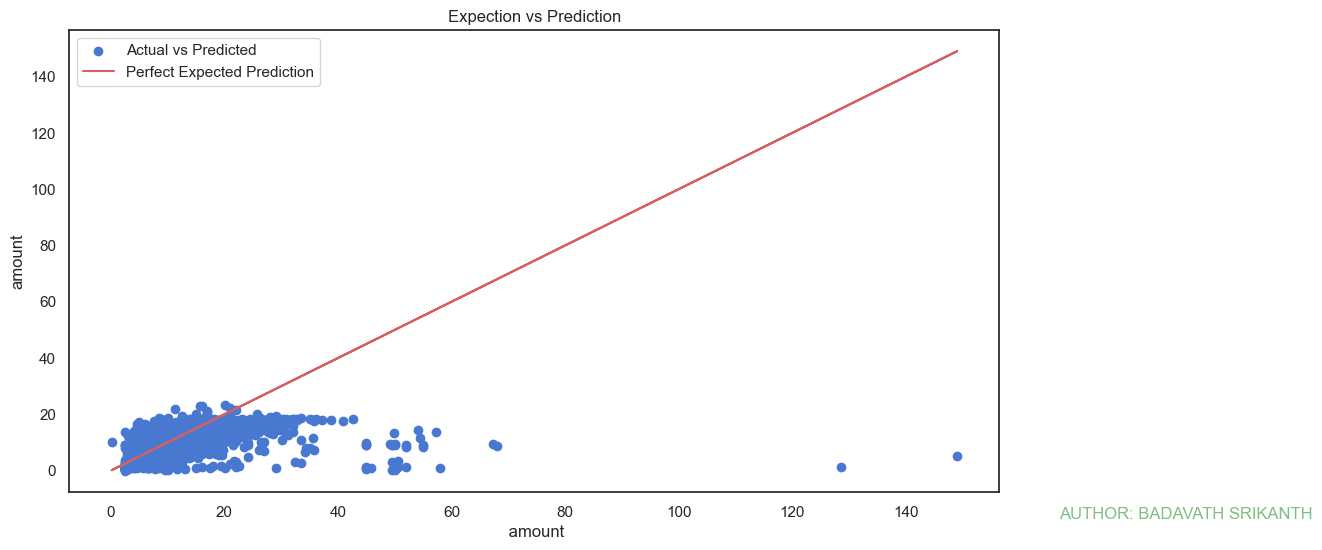

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit (X_train, y_train)
Yhat_lr = lr.predict(X_test)
model_train_evaluation(y_test, Yhat_lr, 'Linear regression Model')

# Linear regression evaluation

In [122]:
test_pred = lr.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,71.122769
1,52:16.0,77.208791
2,35:00.0,82.661472
3,30:42.0,90.363558
4,51:00.0,74.339843


# Ridge regression evaluation


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Ridge regression Model : 2.0780999458402265
Mean Squared Error(MSE) of Ridge regression Model : 15.841577176382525
Root Mean Squared Error (RMSE) of Ridge regression Model : 3.98014788373278
Mean absolute percentage error (MAPE) of Ridge regression Model : 0.23473513576789015
Explained Variance Score (EVS) of Ridge regression Model : 0.4332543697240693
R2 of Ridge regression Model : 0.43

 



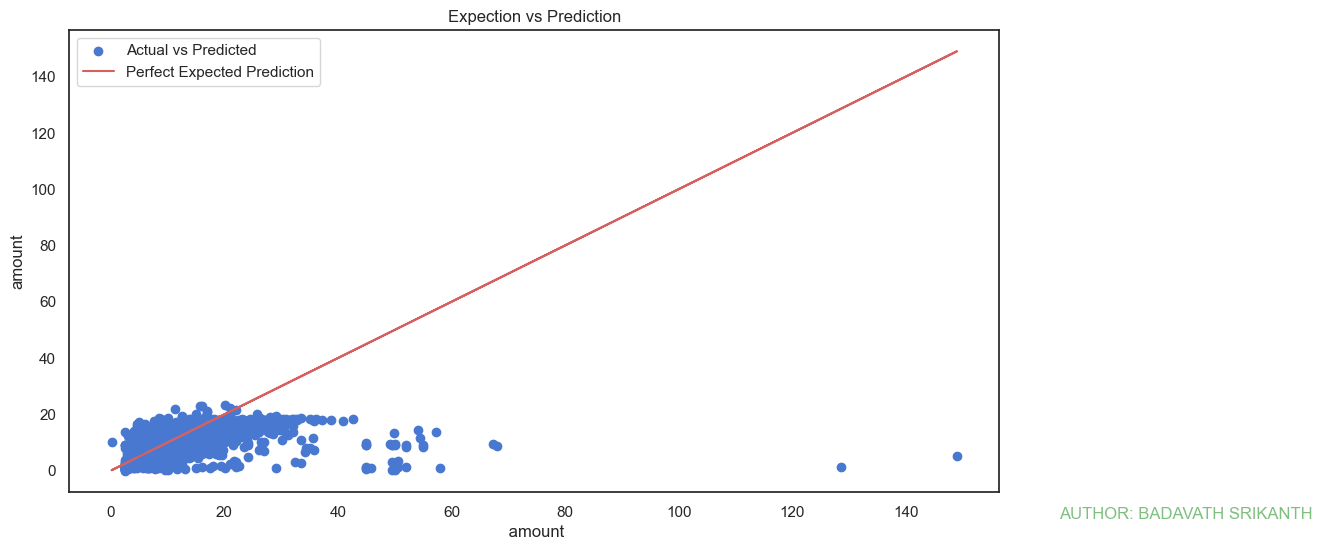

In [123]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit (X_train, y_train)
Yhat_ridge = ridge.predict(X_test)
model_train_evaluation(y_test, Yhat_ridge, 'Ridge regression Model')

In [124]:
test_pred = ridge.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,71.122337
1,52:16.0,77.208128
2,35:00.0,82.660677
3,30:42.0,90.362499
4,51:00.0,74.339297


# Random Forest regression evaluation


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Random Forest Regression Model : 1.8246320541760723
Mean Squared Error(MSE) of Random Forest Regression Model : 11.71372282269526
Root Mean Squared Error (RMSE) of Random Forest Regression Model : 3.4225316394001766
Mean absolute percentage error (MAPE) of Random Forest Regression Model : 0.21998528190730962
Explained Variance Score (EVS) of Random Forest Regression Model : 0.5815413597329073
R2 of Random Forest Regression Model : 0.58

 



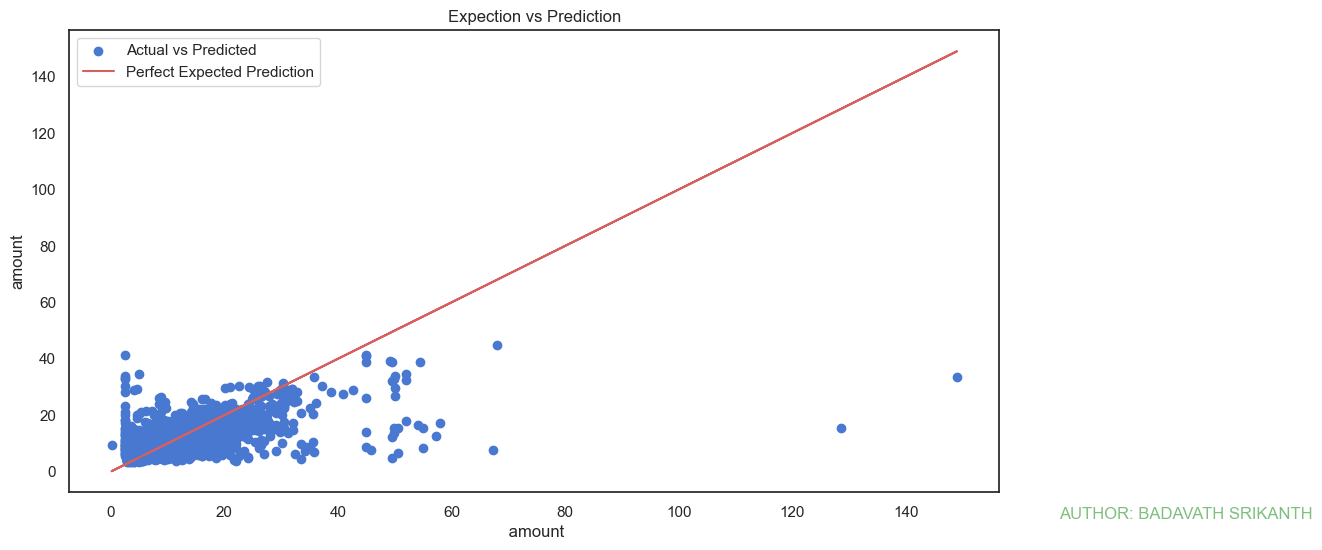

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit (X_train, y_train)
Yhat_rf = rf.predict(X_test)
model_train_evaluation(y_test, Yhat_rf, 'Random Forest Regression Model')

In [126]:
test_pred = rf.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,11.8000
1,52:16.0,17.3150
2,35:00.0,22.9899
3,30:42.0,21.1656
4,51:00.0,16.8940


# CatBoost regression evaluation


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Ridge regression Model : 1.8206223622046376
Mean Squared Error(MSE) of Ridge regression Model : 11.743586936377385
Root Mean Squared Error (RMSE) of Ridge regression Model : 3.4268917310556204
Mean absolute percentage error (MAPE) of Ridge regression Model : 0.21303853911017198
Explained Variance Score (EVS) of Ridge regression Model : 0.5798792291883816
R2 of Ridge regression Model : 0.58

 



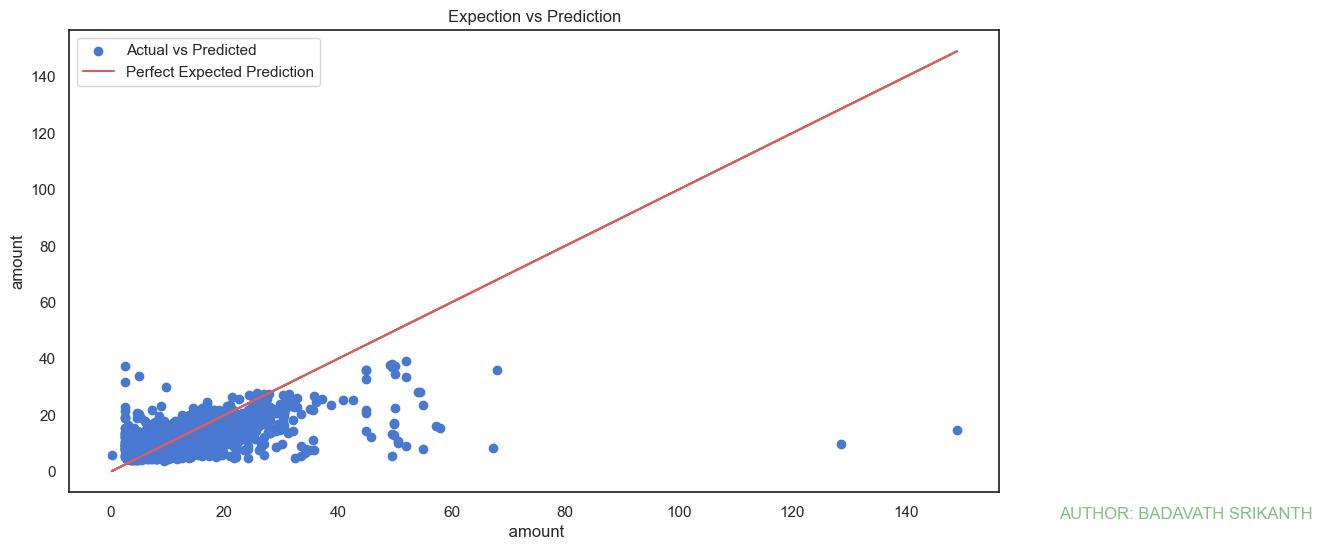

In [127]:
from catboost import CatBoostRegressor
Cat = CatBoostRegressor(loss_function='RMSE', learning_rate = 0.1, 
                        max_depth = 5,  n_estimators = 100, silent = True)
Cat.fit (X_train, y_train)
Cat.fit (X_train, y_train)
Yhat_Cat = Cat.predict(X_test)
model_train_evaluation(y_test, Yhat_Cat, 'Ridge regression Model')

In [128]:
test_pred = Cat.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,9.921541
1,52:16.0,15.298525
2,35:00.0,20.983101
3,30:42.0,21.999269
4,51:00.0,15.006817


# SGD regression evaluation


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of SGD Regression Model : 2.072597590991708
Mean Squared Error(MSE) of SGD Regression Model : 15.921217851055186
Root Mean Squared Error (RMSE) of SGD Regression Model : 3.9901400791269452
Mean absolute percentage error (MAPE) of SGD Regression Model : 0.2325437788507878
Explained Variance Score (EVS) of SGD Regression Model : 0.4304087340557946
R2 of SGD Regression Model : 0.43

 



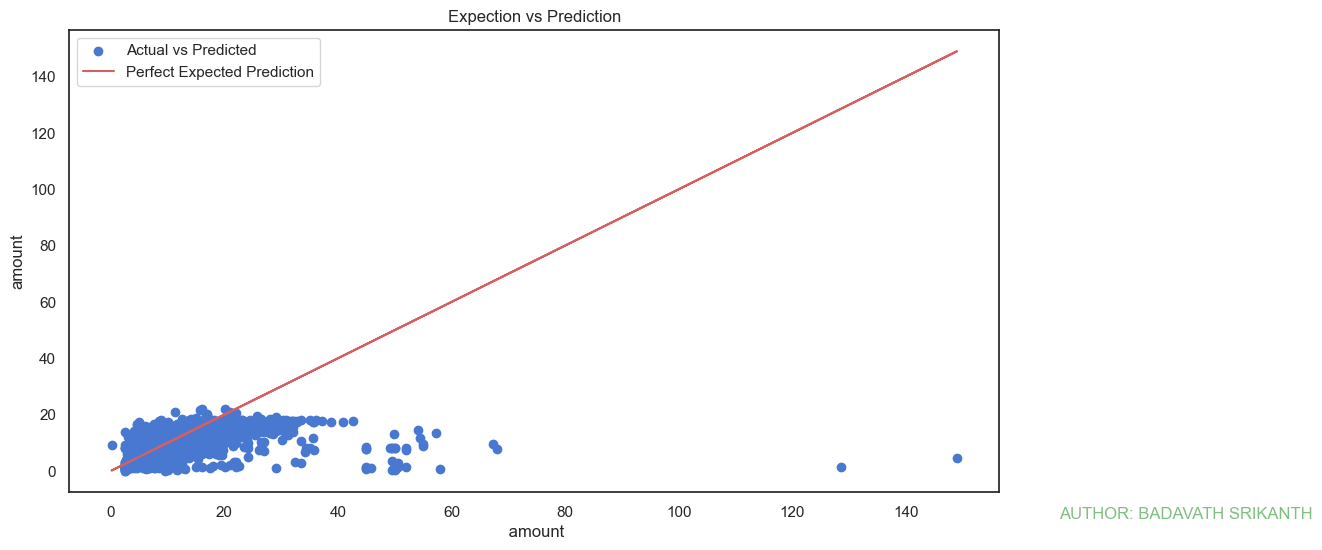

In [129]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit (X_train, y_train)
Yhat_SGD = SGD.predict(X_test)
model_train_evaluation(y_test, Yhat_SGD, 'SGD Regression Model')

In [130]:
test_pred = SGD.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,66.492416
1,52:16.0,71.665630
2,35:00.0,77.843682
3,30:42.0,85.379107
4,51:00.0,69.495103


# LGBM regression evaluation

In [131]:
!pip install lightgbm



 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of LGBM Regression Model : 1.7836300176293929
Mean Squared Error(MSE) of LGBM Regression Model : 11.60102134871308
Root Mean Squared Error (RMSE) of LGBM Regression Model : 3.4060272090388652
Mean absolute percentage error (MAPE) of LGBM Regression Model : 0.20554212317670156
Explained Variance Score (EVS) of LGBM Regression Model : 0.5849925448638895
R2 of LGBM Regression Model : 0.58

 



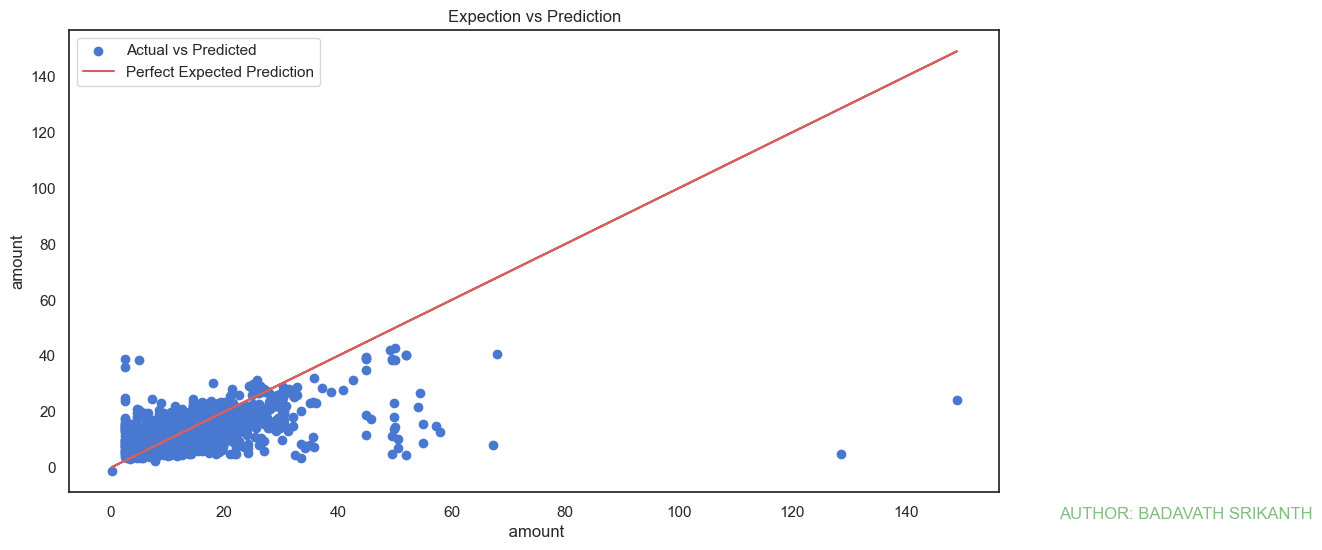

In [132]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor (boosting_type = 'gbdt', num_leaves = 31,  learning_rate = 0.1, 
                       max_depth = 5, n_estimators = 100, silent = True)
LGBM.fit (X_train, y_train)
Yhat_LGBM = LGBM.predict(X_test)
model_train_evaluation(y_test, Yhat_LGBM, 'LGBM Regression Model')

In [133]:
test_pred = LGBM.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,7.278928
1,52:16.0,12.984257
2,35:00.0,19.406716
3,30:42.0,21.458875
4,51:00.0,11.881098


# GradientBoosting regression evaluation


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Gradient Boosting Regression Model : 1.8353964706933033
Mean Squared Error(MSE) of Gradient Boosting Regression Model : 12.01351139994926
Root Mean Squared Error (RMSE) of Gradient Boosting Regression Model : 3.466051269088393
Mean absolute percentage error (MAPE) of Gradient Boosting Regression Model : 0.2176622428385916
Explained Variance Score (EVS) of Gradient Boosting Regression Model : 0.5702257282556649
R2 of Gradient Boosting Regression Model : 0.57

 



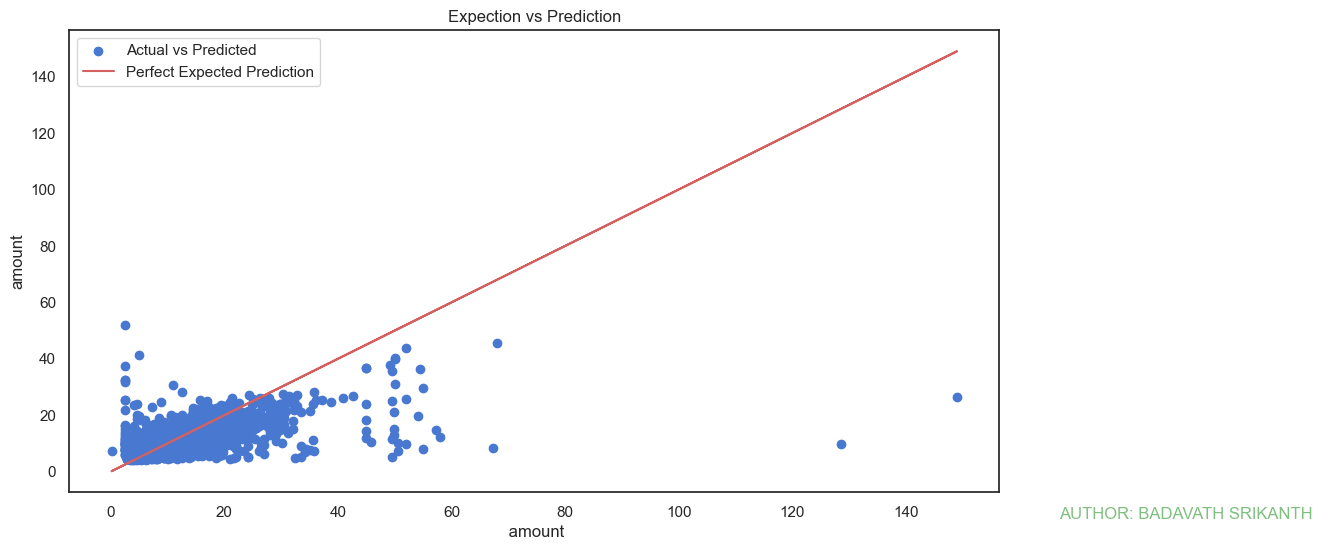

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit (X_train, y_train)
Yhat_GB = GB.predict(X_test)
model_train_evaluation(y_test, Yhat_GB, 'Gradient Boosting Regression Model')

In [135]:
test_pred = GB.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['amount'])
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()

,unique_id,amount
0,26:21.0,-0.612326
1,52:16.0,2.194422
2,35:00.0,17.690678
3,30:42.0,17.870539
4,51:00.0,4.085759


In [136]:
Submission.to_csv('Submission.csv', index = False)

In [137]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_test['haversine_distance_log'] = np.log(df_test['haversine_distance'].values + 1)
df_test['haversine_distance_sqrt'] = np.sqrt(df_test['haversine_distance'].values)

df_train = df.drop(['unique_id', 'date_time_of_pickup', 'pickup_weekday', 'fare', 'amount', 'base_fare', 'haversine_distance_sq', 'pickup_hour'], axis=1)
df_test_copy = df_test.drop(['unique_id', 'base_fare', 'date_time_of_pickup', 'pickup_weekday', 'pickup_hour'], axis=1)

# Ensure both datasets have the same set of features
common_features = set(df_train.columns) & set(df_test_copy.columns)
df_train = df_train[common_features]
df_test_copy = df_test_copy[common_features]

X = df_train.copy()
y = df['fare']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(df_test_copy)

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_scaled, y, test_size=0.3)



 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of LGBM Regression Model : 1.7836300176293929
Mean Squared Error(MSE) of LGBM Regression Model : 11.60102134871308
Root Mean Squared Error (RMSE) of LGBM Regression Model : 3.4060272090388652
Mean absolute percentage error (MAPE) of LGBM Regression Model : 0.20554212317670156
Explained Variance Score (EVS) of LGBM Regression Model : 0.5849925448638895
R2 of LGBM Regression Model : 0.58

 



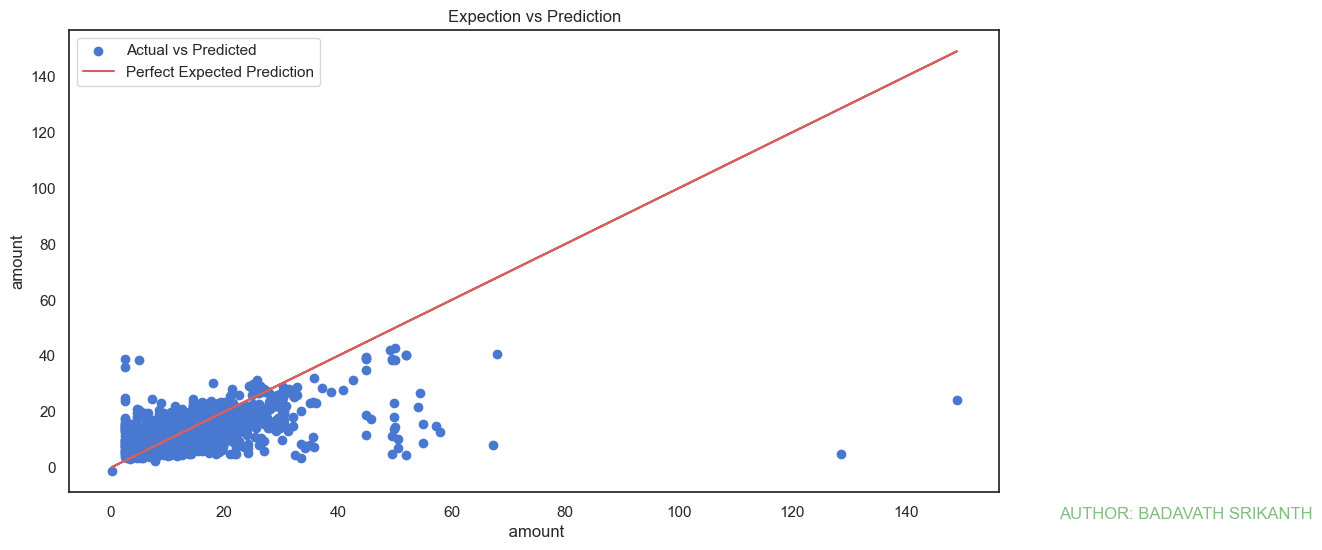

In [139]:
from lightgbm import LGBMRegressor
import pandas as pd

# Convert X_train and X_test to DataFrames
X_train_df = pd.DataFrame(X_train, columns=df_train.columns[:-1])  # Exclude the last column
X_test_df = pd.DataFrame(X_test, columns=df_test_copy.columns[:-1])  # Exclude the last column

# Align the columns of X_test_df with X_train
X_test_aligned, _ = X_test_df.align(X_train_df, join='right', axis=1)

# Train the LGBMRegressor model
LGBM = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    silent=True
)

LGBM.fit(X_train_df, y_train)
Yhat_LGBM = LGBM.predict(X_test_aligned)
model_train_evaluation(y_test, Yhat_LGBM, 'LGBM Regression Model')


In [140]:
# Convert test_X to a DataFrame
test_X_df = pd.DataFrame(test_X, columns=df_test_copy.columns[:-1])  # Exclude the last column

# Align the columns of test_X_df with X_train_df
test_X_aligned, _ = test_X_df.align(X_train_df, join='right', axis=1)

# Predict on the aligned test data
test_pred = LGBM.predict(test_X_aligned)

# Create the submission DataFrame
Submission = pd.DataFrame(test_pred, columns=['fare'])
Submission['amount'] = df_test['base_fare'] + Submission['fare']
Submission['unique_id'] = df_test['unique_id']
Submission = Submission[['unique_id', 'amount']]
Submission.head()


,unique_id,amount
0,26:21.0,10.778928
1,52:16.0,16.484257
2,35:00.0,21.906716
3,30:42.0,23.958875
4,51:00.0,14.381098
